In [1]:
# Notebook for estimating development from Rt and cases
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.min_rows', 50)


import matplotlib.pyplot as plt
# %matplotlib widget
plt.rcParams['figure.figsize'] = (14,10)
plt.rcParams["image.cmap"] = "tab10"
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.tab10.colors)
#Settings for plotting
fs_label = 16
parameters = {
                'axes.labelsize': fs_label,
                'axes.titlesize': fs_label+4,
                'xtick.labelsize': fs_label,
                'ytick.labelsize': fs_label, 
                'legend.fontsize': fs_label, 
                'lines.markersize': 10,
                'lines.linewidth': 3
             }
plt.rcParams.update(parameters)

# %matplotlib widget
import matplotlib.colors as colors
from matplotlib import cm # Colormaps

import locale
import matplotlib.dates as mdates
locale.setlocale(locale.LC_TIME,"Danish")
locale.setlocale(locale.LC_ALL,"Danish")

## Useful commands to copy:
# cmap = plt.cm.get_cmap('Dark2',len(ageGroups))
# ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
# ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%b'))
# plt.rcParams["image.cmap"] = "Dark2"
# plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Dark2.colors)

import os
import math

from datetime import date


saveFigures = True
print('saveFigures is set to: '+str(saveFigures))

print('Done loading packages')

def rnMean(data,meanWidth):
    return np.convolve(data, np.ones(meanWidth)/meanWidth, mode='valid')
def rnTime(t,meanWidth):
    return t[math.floor(meanWidth/2):-math.ceil(meanWidth/2)+1]

saveFigures is set to: True
Done loading packages


In [2]:
# Load the admitted file to get weekly number and dates 
dfAdm = pd.read_excel('Admitted/Admitted.xlsx')
dfAdm = dfAdm.transpose()
dfAdm.columns = dfAdm.iloc[0]
dfAdm = dfAdm.drop(['Aldersgruppe']) 
curDates =  pd.to_datetime(dfAdm.index,format='%d_%m_%Y')

In [3]:
df_RT = pd.read_csv('Rt/Rt_cases_2021_05_11.csv',delimiter=';')

df_RT["SampleDate"] = df_RT["SampleDate"].astype('datetime64[D]')
df_RT['estimate'] = pd.to_numeric(df_RT["estimate"].astype(str).apply(lambda x: x.replace(',','.')))
df_RT['uncertainty_lower'] = pd.to_numeric(df_RT["uncertainty_lower"].astype(str).apply(lambda x: x.replace(',','.')))
df_RT['uncertainty_upper'] = pd.to_numeric(df_RT["uncertainty_upper"].astype(str).apply(lambda x: x.replace(',','.')))

df_RT

#allFiles = os.listdir('Rt/')

#for curFile in allFiles:
#    # print(curFile)
#    df = pd.read_csv('Rt/'+curFile,delimiter=';')
#
#    if (df.columns[0] == 'date_sample'):
#        df["date_sample"] = df["date_sample"].astype('datetime64[D]')
#        curDates = df.date_sample
#    else:
#        df["SampleDate"] = df["SampleDate"].astype('datetime64[D]')
#        curDates = df.SampleDate
#    df['estimate'] = pd.to_numeric(df["estimate"].astype(str).apply(lambda x: x.replace(',','.')))
#    df['uncertainty_lower'] = pd.to_numeric(df["uncertainty_lower"].astype(str).apply(lambda x: x.replace(',','.')))
#    df['uncertainty_upper'] = pd.to_numeric(df["uncertainty_upper"].astype(str).apply(lambda x: x.replace(',','.')))
#    
#    plt.plot(curDates,np.ones(curDates.shape),'b--')
#    plt.plot(curDates,df.estimate,color=[0,0,0,0.2])

,SampleDate,estimate,uncertainty_lower,uncertainty_upper
0,2020-03-26,0.8,0.6,1.0
1,2020-03-27,0.8,0.7,1.0
2,2020-03-28,0.8,0.7,1.0
3,2020-03-29,0.8,0.6,1.0
4,2020-03-30,0.8,0.6,1.0
5,2020-03-31,0.8,0.6,0.9
6,2020-04-01,0.8,0.6,0.9
7,2020-04-02,0.8,0.6,0.9
8,2020-04-03,0.8,0.6,0.9
9,2020-04-04,0.8,0.6,0.9


In [4]:
# Go through the weekly files and get number of cases
ssidatapath = "ssi_data"
rootdir = os.getcwd() +"/" + ssidatapath

dfCase = pd.DataFrame(columns=dfAdm.columns)
# dfTest = pd.DataFrame(columns=dfAdm.columns)
# dfPosP = pd.DataFrame(columns=dfAdm.columns)

for k in range(0,len(curDates)):
    
    d = curDates[k]
    curIndex = dfAdm.index[k]

    thisDateStr = d.strftime('%Y-%m-%d')
    curDir = rootdir + '/SSI_data_' + thisDateStr 
    curFilePath = curDir + '/Cases_by_age.csv'
    #print(curFilePath)
    try:
        curdf = pd.read_csv(curFilePath,delimiter=';',dtype=str)

        curdf['Antal_bekræftede_COVID-19'] = pd.to_numeric(curdf['Antal_bekræftede_COVID-19'].astype(str).apply(lambda x: x.replace('.','')))
        # curdf['Antal_testede'] = pd.to_numeric(curdf['Antal_testede'].astype(str).apply(lambda x: x.replace('.','')))
        # curdf['Procent_positive'] = pd.to_numeric(curdf['Procent_positive'].astype(str).apply(lambda x: x.replace(',','.')))

        dfCase.loc[curIndex] = curdf['Antal_bekræftede_COVID-19'].values
        # dfTest.loc[curIndex] = curdf['Antal_testede'].values
        # dfPosP.loc[curIndex] = curdf['Procent_positive'].values
    except:
        print("file_not_found:")
        print(curFilePath)


file_not_found:
/home/berrig/Documents/PandemiX/DanskeData/ssi_data/SSI_data_2020-11-17/Cases_by_age.csv
file_not_found:
/home/berrig/Documents/PandemiX/DanskeData/ssi_data/SSI_data_2021-05-18/Cases_by_age.csv


In [5]:
# Calculate the weekly change
dfCaseDiff = dfCase.diff().iloc[1:]
# Modify the data to suit the actual vaccinated groups:
dfCaseDiff["10-19"] = dfCaseDiff["10-19"].apply(lambda x: int(0.4*x))
# Get the names of the age-groups
allCols = dfCase.columns
# Format the dates into datetime
plotDates =  pd.to_datetime(dfCaseDiff.index,format='%d_%m_%Y')
# Print the latest results to check
dfCaseDiff.tail()

Aldersgruppe,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,90+,I alt
13_04_2021,396,342,939,662,638,575,271,162,45,7,4552
20_04_2021,582,395,982,785,746,644,301,137,21,10,5196
27_04_2021,520,362,889,724,755,656,289,112,30,4,4885
04_05_2021,477,390,1204,836,827,699,372,120,16,6,5532
11_05_2021,503,538,1416,942,926,786,377,107,26,1,6431


In [6]:
# Calculation of size of age-group
dfAges = pd.read_excel('DKfolketal2021clean.xlsx')
DK_age = []


#a_list = list(range(0, 100, 10))
#for i, a in enumerate(a_list):
#    if a == a_list[-1]:
#        DK_age.append(dfAges.iloc[a:].Antal.sum())
#    else:
#        DK_age.append(dfAges.iloc[a:a_list[i+1]].Antal.sum())
#DK_age.append(dfAges.Antal.sum())

DK_age.append(dfAges.iloc[0:10].Antal.sum())
DK_age.append(dfAges.iloc[16:20].Antal.sum())
DK_age.append(dfAges.iloc[20:30].Antal.sum())
DK_age.append(dfAges.iloc[30:40].Antal.sum())
DK_age.append(dfAges.iloc[40:50].Antal.sum())
DK_age.append(dfAges.iloc[50:60].Antal.sum())
DK_age.append(dfAges.iloc[60:70].Antal.sum())
DK_age.append(dfAges.iloc[70:80].Antal.sum())
DK_age.append(dfAges.iloc[80:90].Antal.sum())
DK_age.append(dfAges.iloc[90:].Antal.sum())
DK_age.append(dfAges.Antal.sum())


DK_age = np.array(DK_age)
DK_age

case_hosp_rate = np.array([i/100 for i in [0, 1, 2, 4, 6, 8, 13, 22, 40, 40]])

# 0-29, 30-69, 70-
immune_rate = np.array([0.1]*3 + [0.07]*2 + [0.06]*5)

In [7]:
# Vaccinationskalender, manuelt aflæst 12/05-2021
vaccKal = pd.DataFrame()

neverDate = np.datetime64('2021-10-30') # A day "far out" in the future, to not show on plot
vaccKal['0-9'] = [neverDate,neverDate,neverDate]
vaccKal['10-19'] = [np.datetime64('2021-05-24'),np.datetime64('2021-06-14'),np.datetime64('2021-07-19')]
vaccKal['20-29'] = [np.datetime64('2021-06-14'),np.datetime64('2021-07-19'),np.datetime64('2021-08-31')]
vaccKal['30-39'] = [np.datetime64('2021-06-21'),np.datetime64('2021-08-01'),np.datetime64('2021-08-31')]
vaccKal['40-49'] = [np.datetime64('2021-05-24'),np.datetime64('2021-06-28'),np.datetime64('2021-08-02')]
vaccKal['50-59'] = [np.datetime64('2021-05-03'),np.datetime64('2021-05-31'),np.datetime64('2021-07-05')]
vaccKal['60-69'] = [np.datetime64('2021-04-05'),np.datetime64('2021-05-24'),np.datetime64('2021-06-28')]
vaccKal['70-79'] = [np.datetime64('2021-03-29'),np.datetime64('2021-04-26'),np.datetime64('2021-05-31')]
vaccKal['80-89'] = [np.datetime64('2021-02-01'),np.datetime64('2021-03-29'),np.datetime64('2021-04-26')]
vaccKal['90+'] =   [np.datetime64('2021-02-01'),np.datetime64('2021-02-22'),np.datetime64('2021-03-15')]
# vaccKal['I alt'] = [np.datetime64('2021-07-19'),np.datetime64('2021-08-02'),np.datetime64('2021-08-31')]
vaccKal['I alt'] = [neverDate,neverDate,neverDate]

vaccKal

,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,90+,I alt
0,2021-10-30,2021-05-24,2021-06-14,2021-06-21,2021-05-24,2021-05-03,2021-04-05,2021-03-29,2021-02-01,2021-02-01,2021-10-30
1,2021-10-30,2021-06-14,2021-07-19,2021-08-01,2021-06-28,2021-05-31,2021-05-24,2021-04-26,2021-03-29,2021-02-22,2021-10-30
2,2021-10-30,2021-07-19,2021-08-31,2021-08-31,2021-08-02,2021-07-05,2021-06-28,2021-05-31,2021-04-26,2021-03-15,2021-10-30


In [8]:
# Get the daily cases (Run young_age_groups to save new csv)
dfCaseDiffDaily = pd.read_csv('DailyCasesAveraged.csv')

# Get the corresponding dates
curDatesDaily = pd.to_datetime(dfCaseDiffDaily.Dato).values
plotDatesDaily = np.arange(curDatesDaily[0],curDatesDaily[-1]+np.timedelta64(1,'D'),np.timedelta64(1,'D'))

# Adjust to vaccinated groups:
dfCaseDiffDaily["10-19"] = dfCaseDiffDaily["10-19"].apply(lambda x: x*0.4)

# Print to see the last days
dfCaseDiffDaily.tail()



,Unnamed: 0,Dato,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,90+,I alt
359,359,2021-05-14,85.0,107.6,278.000000,157.500000,154.0,131.5,57.500000,17.000000,2.0,1.5,1153.0
360,360,2021-05-15,76.0,82.0,235.666667,137.333333,142.0,103.0,43.666667,11.333333,3.0,1.0,958.0
361,361,2021-05-16,76.0,82.0,235.666667,137.333333,142.0,103.0,43.666667,11.333333,3.0,1.0,958.0
362,362,2021-05-17,76.0,82.0,235.666667,137.333333,142.0,103.0,43.666667,11.333333,3.0,1.0,958.0
363,363,2021-05-18,68.0,99.6,229.000000,96.000000,124.0,98.0,39.000000,12.000000,1.0,0.0,916.0


In [9]:
def time_intervals(t_init, t_cur, t_final):
    tspan = np.timedelta64(t_final - t_init,'D')
    dt = np.timedelta64(pd.to_datetime(t_cur) - t_init,'D') 
    return dt/tspan, dt, tspan

def contact_number(t_list, vcal, RT, x1=0.75, x2=0.95, t_shift=np.timedelta64(14, "D")):
    #t_shift = np.timedelta64(14, "D")
    ret = np.zeros(np.shape(t_list))
    for i, t in enumerate(t_list):
        t = t-t_shift
        if t < vcal[0]:
            ret[i] = RT
        elif vcal[0] <= t < vcal[1]:
            rt, dt, tspan = time_intervals(vcal[0], t, vcal[1])
            ret[i] = RT*((1-rt) + rt*(1-x1))
        elif vcal[1] <= t < vcal[2]:
            rt, dt, tspan = time_intervals(vcal[1], t, vcal[2])
            ret[i] = RT*((1-rt)*(1-x1) + rt*(1-x2))
        elif vcal[2] <= t:
            ret[i] = RT*(1-x2)
    return ret

def predicted_cases(t_list, vcal, RT, gen_time=4.7/7, init_count=1, S0=100000, x1=0.75, x2=0.95, t_shift=np.timedelta64(14, "D")):
    cn = contact_number(t_list, vcal, RT, x1=x1, x2=x2, t_shift=t_shift)
    ret = np.zeros(np.shape(cn))
    S = S0
    ret[0] = init_count
    dark_count = 2
    for i, c in enumerate(cn[1:], 1):
        dt = float(np.timedelta64(t_list[i]-t_list[i-1],"D")/np.timedelta64(7,"D"))
        #ret[i] = ret[i-1]*c**(gen_time*dt)
        ret[i] = ret[i-1]*(c**(gen_time*dt))*S/S0
        S = int(S > ret[i-1]*dark_count)*(S - ret[i-1]*dark_count)
    return ret

#def pct_dots(ax, xes, modelCounts, normConst, top=None):
#    pct_list = list(range(0,101,1))
#    modelCounts_cumul = modelCounts.cumsum()
#    if top == None:
#        top = max(modelCounts)*1.1
#    print(top)
#    for l in pct_list:
#        for j, c in enumerate(modelCounts_cumul[:-1]/normConst):
#            if (c <= l/100 < modelCounts_cumul[j+1]/normConst) and (modelCount[j+1] < top):
#                pct_str = f"{100*modelCounts_cumul[j+1]/normConst:.1f}%"
#                ax.plot(xes[j+1], modelCount[j+1], "+r")
#                ax.text(xes[j+1], modelCount[j+1]+25, pct_str, color="red", fontsize=14)

cmap_name = "viridis" # "rainbow" # "jet" # "cool" # 'plasma'


/usr/lib/python3/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


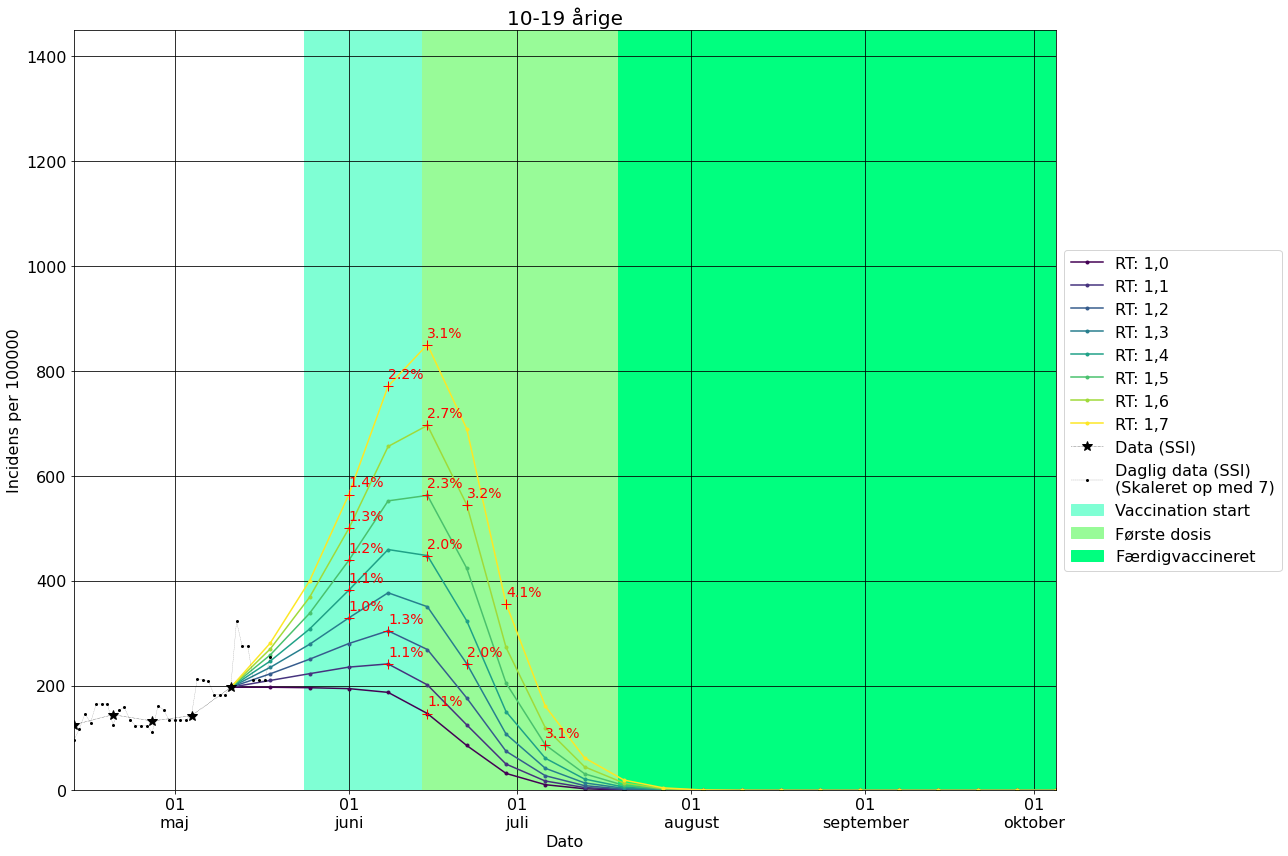

In [10]:
# Forskellige Rt for aldersgruppe, hvor mange ugentligt smittede har vi før gruppen er vaccineret

fig,ax1 = plt.subplots(1,1,figsize=(18,12))

# Decide which agegroup to show (see allCols list)
i = 1
curAge = allCols[i]
curPopSize = DK_age[i]
curImmuneRate = immune_rate[i]


# Use latest day with data
tStart = plotDates[-1]

# Predict tEndWeeks forward
tEndWeeks = 22
tDelta = np.timedelta64(7,'D')

tSpan = np.arange(0,tEndWeeks) # Time span, in number of weeks since tStart
tSpanPlot = np.arange(tStart,tStart+np.timedelta64(7*tEndWeeks,'D'),tDelta) # Time span, as datetime64

# How much to show in plot
xLims = [tStart-tDelta*4,tSpanPlot[-1]]

# Get vaccination dates from calendar
vaccIni, vaccOne, vaccTwo = vaccKal[curAge]

# Get data and initial condition
curData = dfCaseDiff[curAge].values
iniRow = dfCaseDiff.iloc[plotDates == tStart]
iniCount = iniRow[curAge].values[0]

# Plot vaccination
#curMax = max(curData)
ax1.axvspan(vaccIni,vaccOne,color='aquamarine',label='Vaccination start')
ax1.axvspan(vaccOne,vaccTwo,color='palegreen',label='Første dosis')
ax1.axvspan(vaccTwo,tSpanPlot[-1],color='springgreen',label='Færdigvaccineret')

# Generation time (4.7 days), in units of weeks 
genTime = 4.7 / 7 

# Go through a number of RT's
allRTs = np.arange(1.0,1.8,0.1)
# Define a colormap for predictions
cmap = plt.cm.get_cmap(cmap_name,len(allRTs))
cmap_prop = plt.cm.get_cmap('cividis',len(allRTs))
for k in range(0,len(allRTs)):
    curRT = allRTs[k]
    
    # Make prediction with current RT
    # modelCount = iniCount * (curRT**(genTime*tSpan))
    curLabel = f'RT: {curRT:.1f}'.replace('.',',')
    # ax1.plot(tSpanPlot,100000 * modelCount/curPopSize,'.-',#label=curLabel,
    #          linewidth=1.5,markersize=6,color=cmap(k), alpha=0.0)
    
    modelCount2 = predicted_cases(tSpanPlot, vaccKal['10-19'], curRT, 
                                  S0=curPopSize*(1-curImmuneRate), init_count=iniCount, gen_time=genTime)
    ax1.plot(tSpanPlot,100000 * modelCount2/curPopSize,'.-',label=curLabel,
             linewidth=1.5,markersize=6,color=cmap(k))
    
    #pct_dots(ax1, tSpanPlot, modelCount2, curPopSize)

    modelCount2_cumul = modelCount2.cumsum()
    pct_list = list(range(0,11,1))
    for i in pct_list:
        for j, c in enumerate(modelCount2_cumul[:-1]/curPopSize):
            if c <= i/100 < modelCount2_cumul[j+1]/curPopSize:
                pct_str = f"{100*modelCount2_cumul[j+1]/curPopSize:.1f}%"
                ax1.plot(tSpanPlot[j+1], 100000*modelCount2[j+1]/curPopSize, "+r")
                ax1.text(tSpanPlot[j+1], 100000*modelCount2[j+1]/curPopSize+15, pct_str, color="red", fontsize=14)
                
# Plot data
ax1.plot(plotDates,100000 * curData/curPopSize,'k*:',linewidth=0.5,label=f'Data (SSI)')
# Also plot daily data, scaled up to weekly numbers
curDataDaily = dfCaseDiffDaily[curAge].values
ax1.plot(plotDatesDaily,100000 * (curDataDaily*7)/curPopSize,'k.:',linewidth=0.25,markersize=4,label=f'Daglig data (SSI)\n(Skaleret op med 7)')


ax1.set_ylim(bottom = 0,top=1450)
# ax1.set_yscale("log")

ax1.set_xlim(xLims)
# Readable dates on x-axis
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%B'))

ax1.set_ylabel('Incidens per 100000')
ax1.set_xlabel('Dato')

ax1.grid(color='black')

ax1.set_title(curAge+' årige')
if (curAge == 'I alt'):
    ax1.set_title(curAge)

ax1.legend(loc='center left',bbox_to_anchor = (1.0, 0.5))

plt.tight_layout()

10-19 273589
20-29 778740
30-39 696679
40-49 748824
50-59 801166
60-69 667583
70-79 574697
80-89 236648
90+ 45458


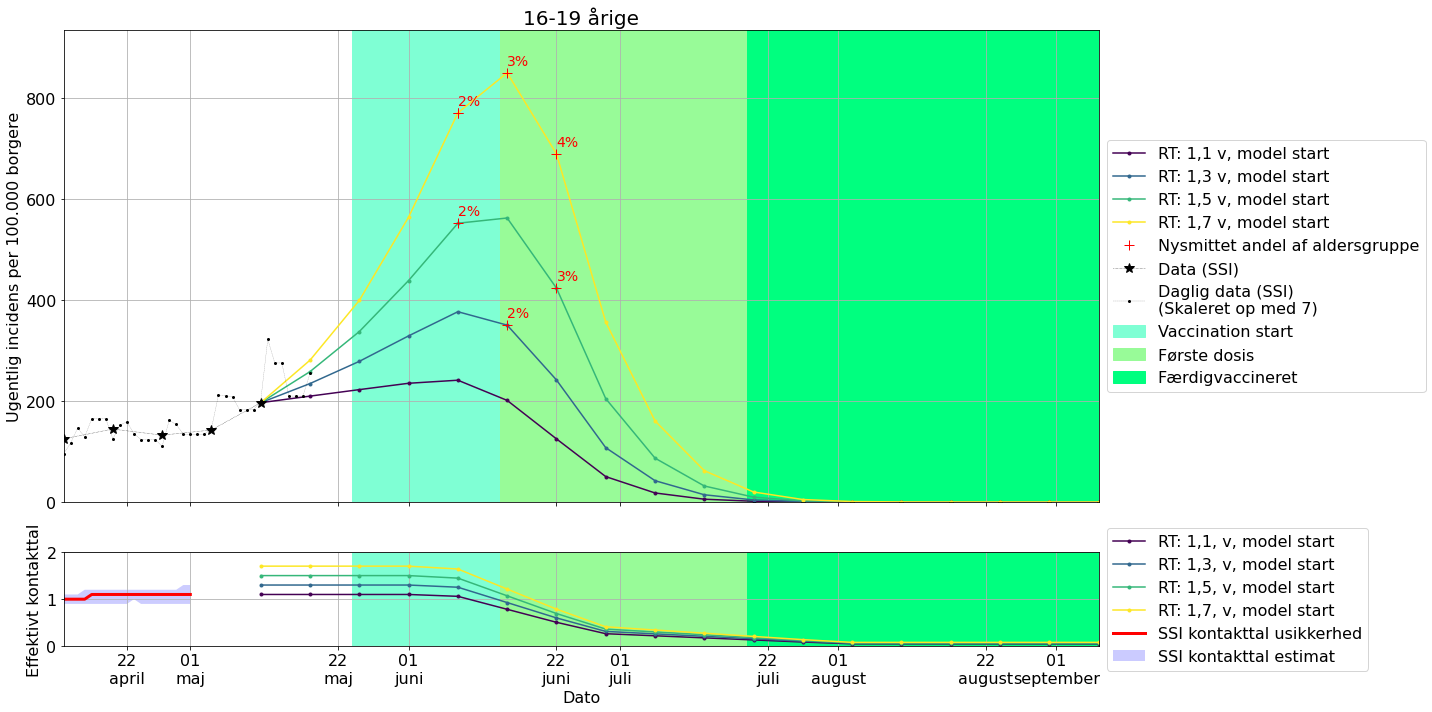

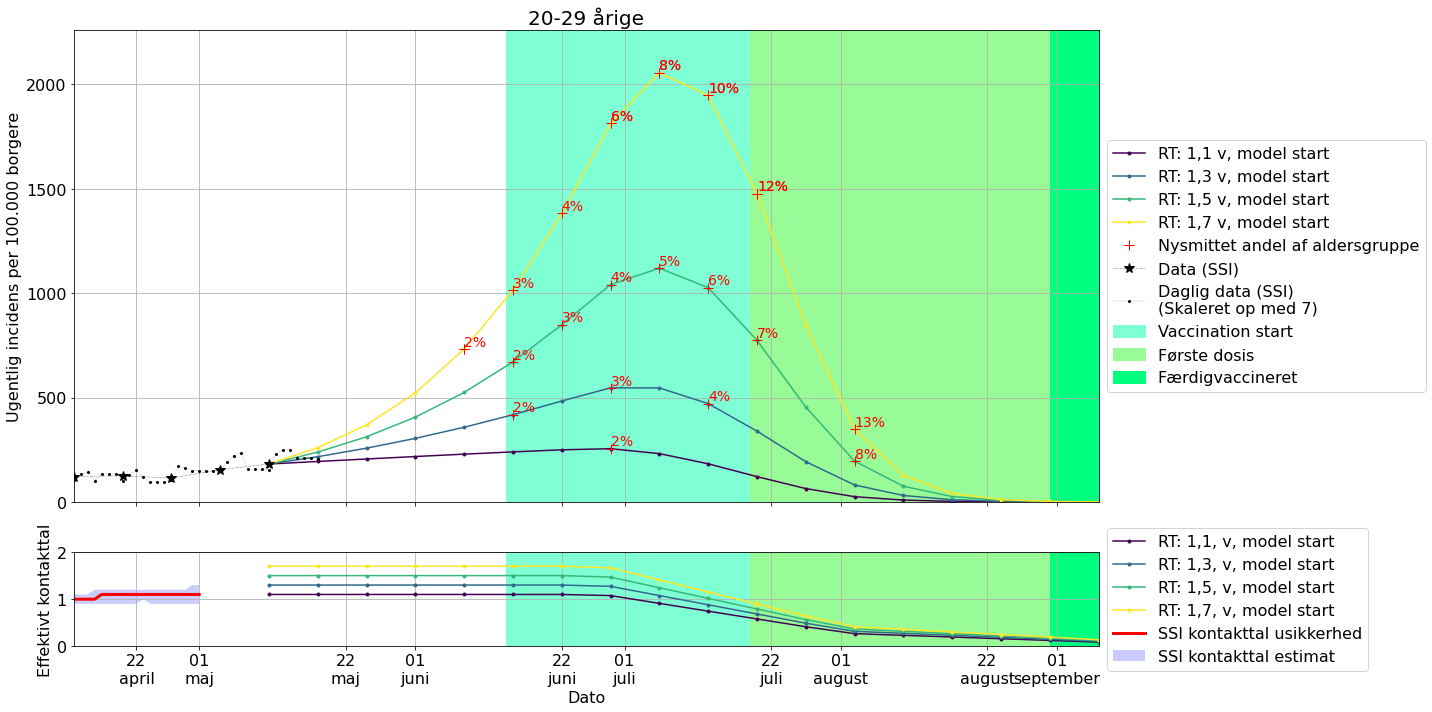

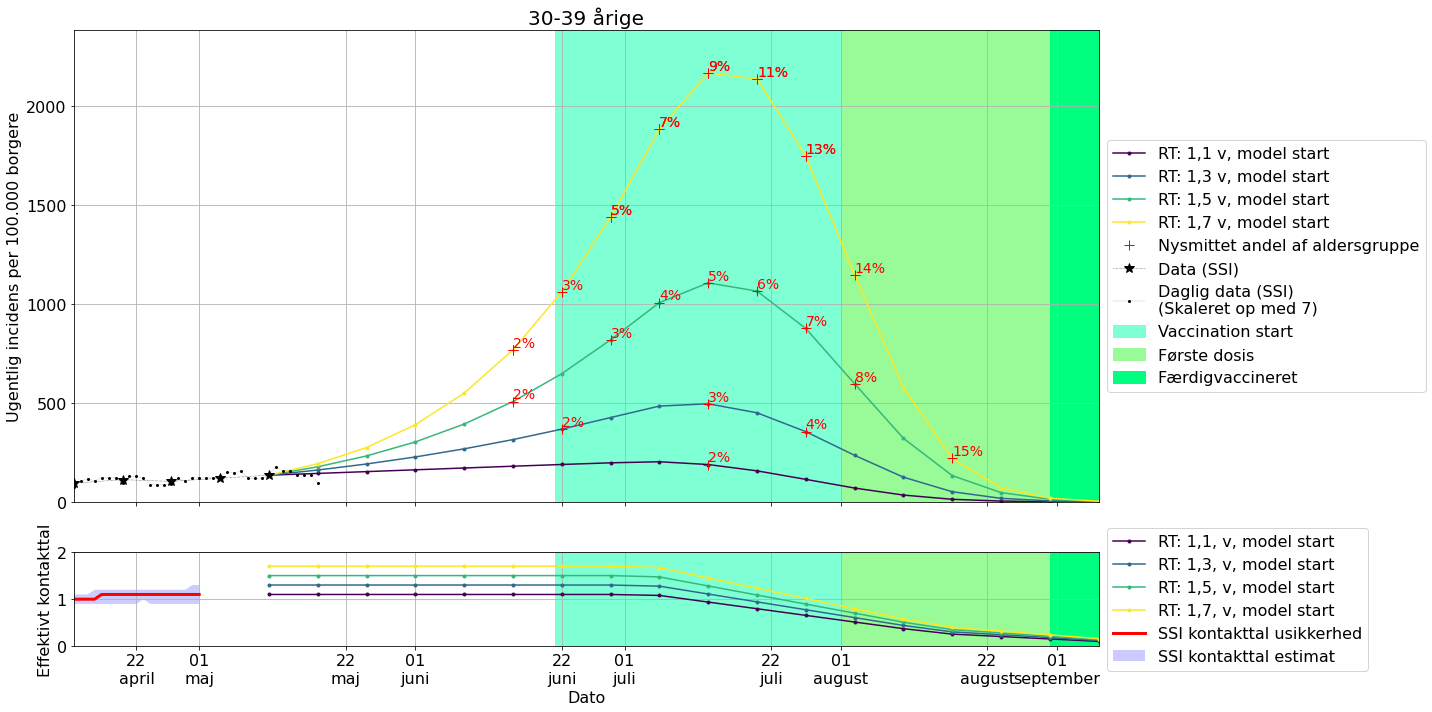

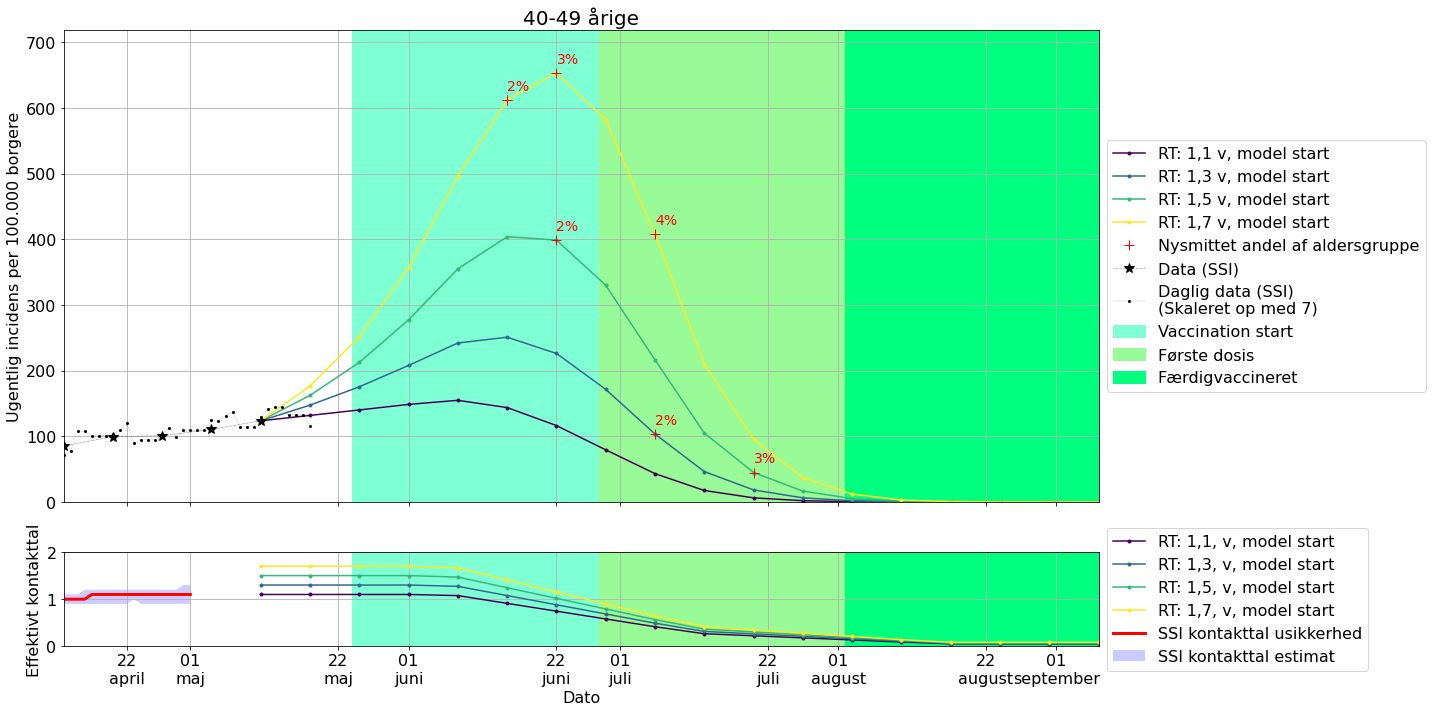

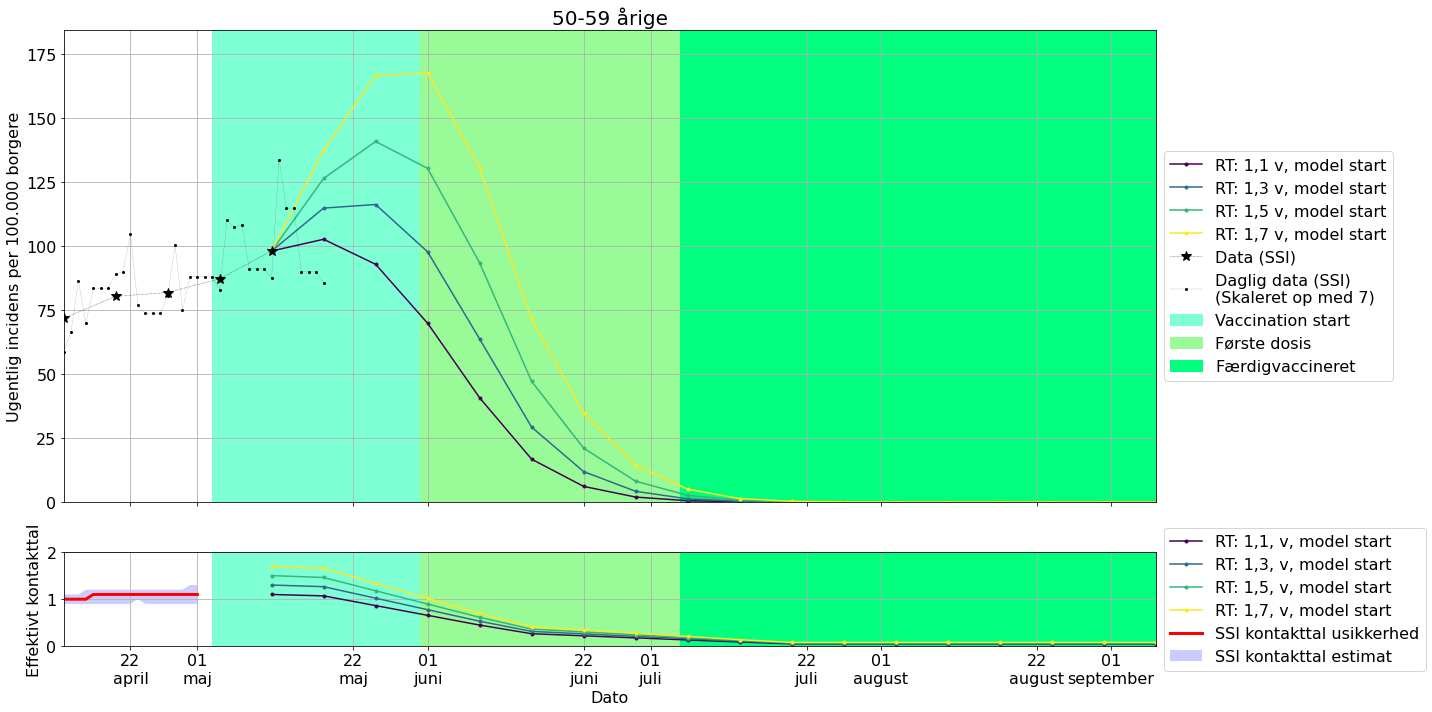

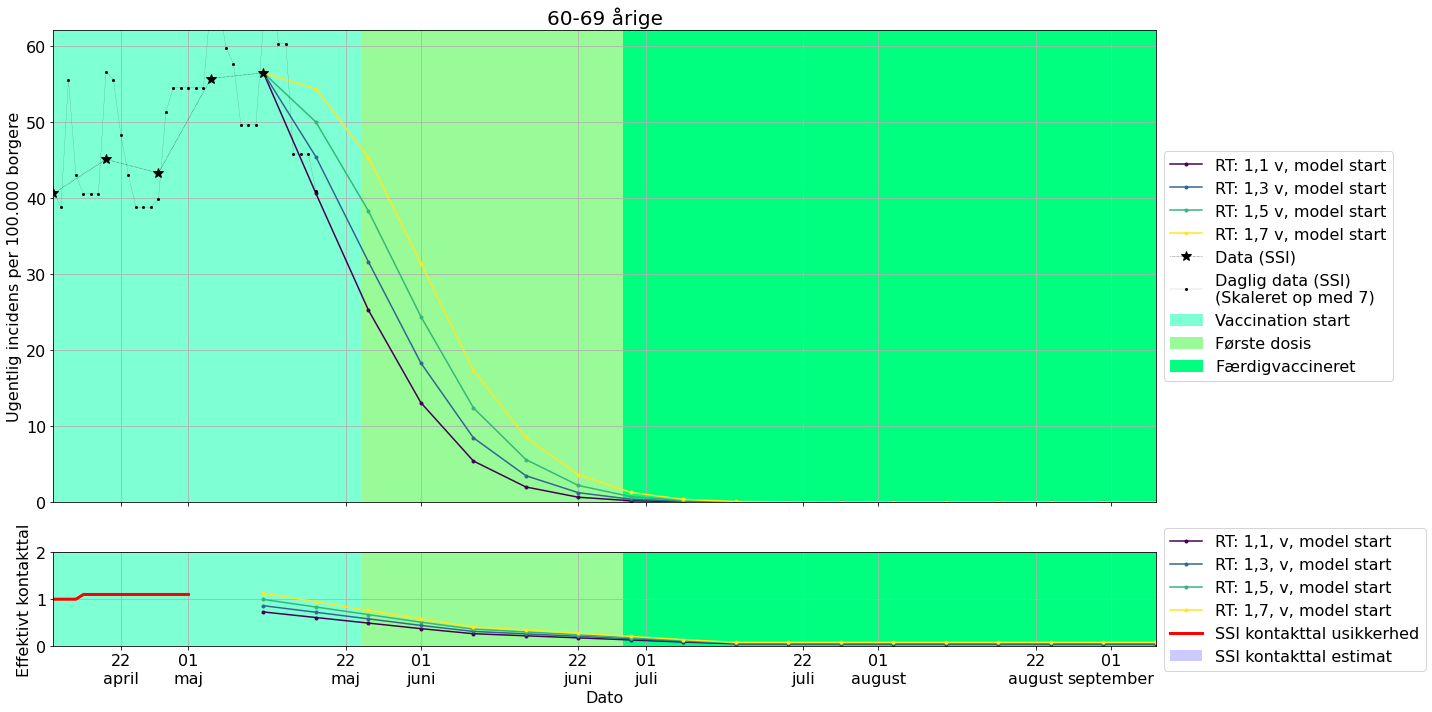

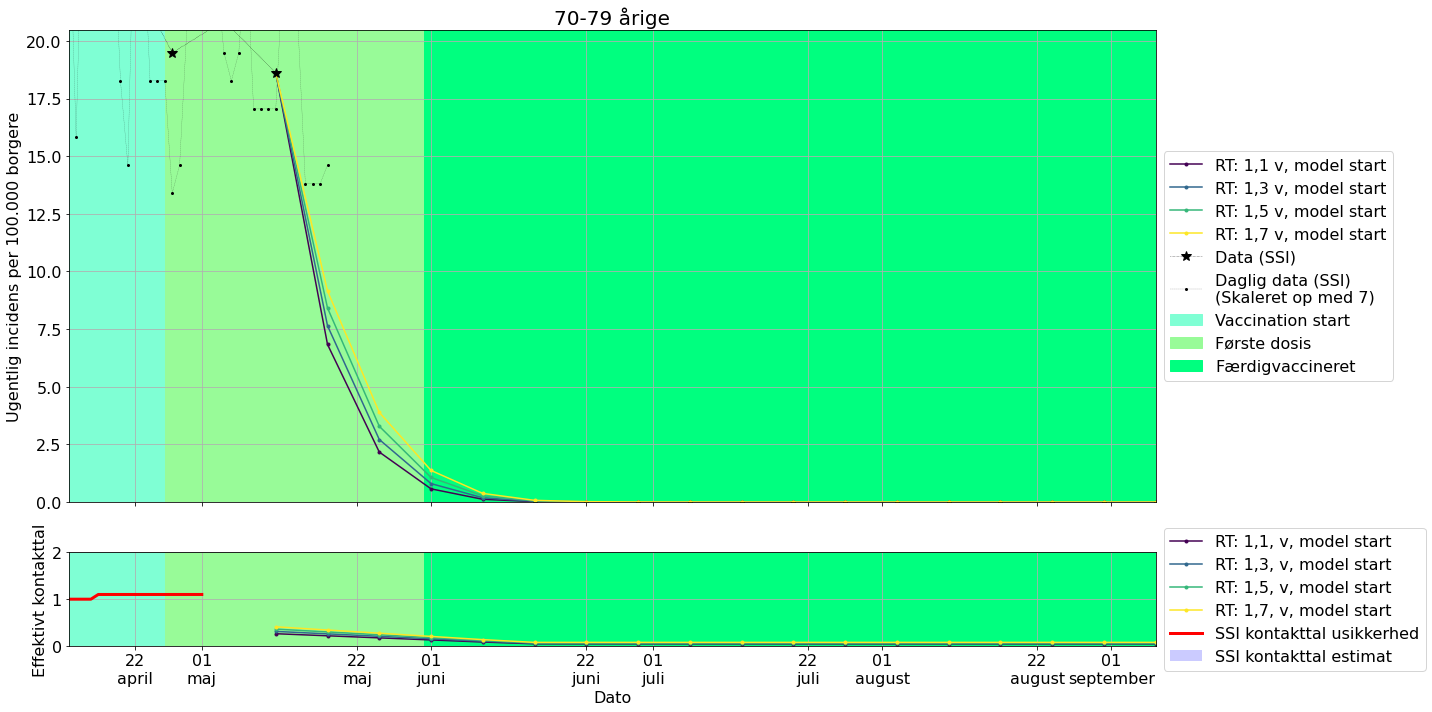

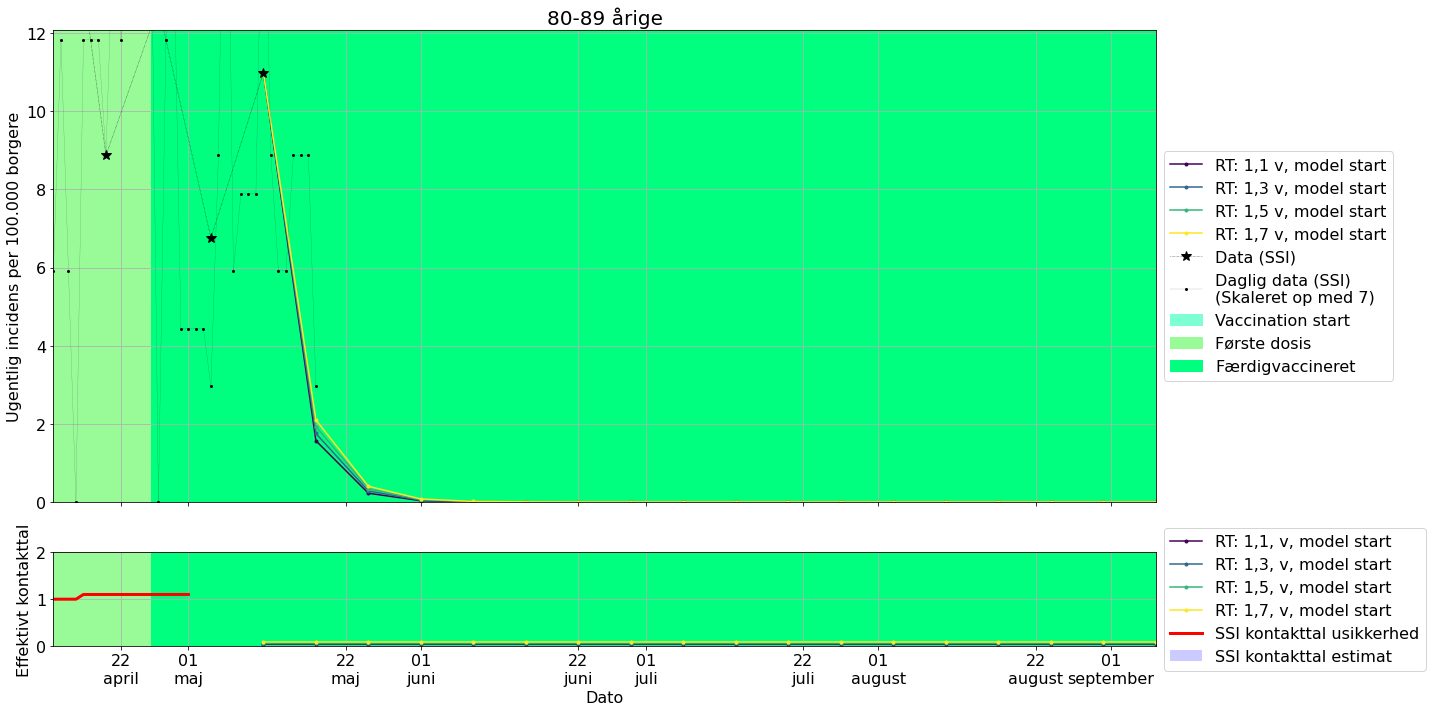

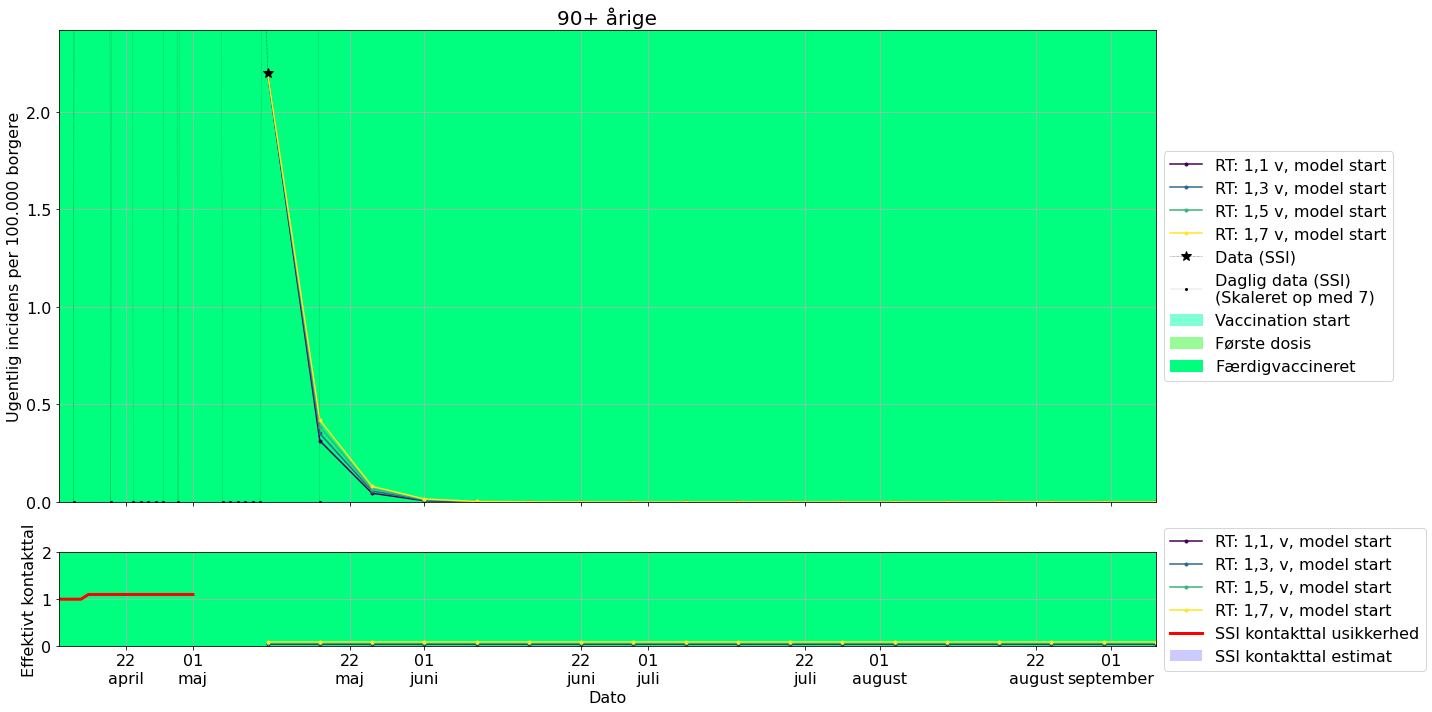

In [11]:
# Forskellige Rt for aldersgruppe, hvor mange ugentligt smittede har vi før gruppen er vaccineret

showMax = False

# tStart = np.datetime64('2021-04-27')
tStart = plotDates[-1]

tEndWeeks = 18
tDelta = np.timedelta64(7,'D')

tSpan = np.arange(0,tEndWeeks) # Time span, in number of weeks since tStart
tSpanPlot = np.arange(tStart,tStart+np.timedelta64(7*tEndWeeks,'D'),tDelta) # Time span, as datetime64

#lastDateStr = pd.to_datetime(tSpanPlot[-1]).strftime('%d. %b')

xLims = [tStart-tDelta*4,tSpanPlot[-1]]

iniRow = dfCaseDiff.iloc[plotDates == tStart]

curCols = dfCaseDiff.columns

genTime = 4.7 / 7 # Generation time, in weeks
allRTs = np.arange(1.1,1.8,0.2)

cmap = plt.cm.get_cmap(cmap_name,len(allRTs))


for i, col in enumerate(curCols[1:-1], 1):

    curAge = curCols[i]
    curPopSize = DK_age[i]
    curImmuneRate = immune_rate[i]
    print(curAge, curPopSize)

    vaccIni, vaccOne, vaccTwo = vaccKal[curAge]
    curData = dfCaseDiff[curAge].values
    curDataDaily = dfCaseDiffDaily[curAge].values
    iniCount = iniRow[curAge].values[0]

    curMax = 1200

    #fig2,ax2 = plt.subplots(1,1,figsize=(20,10))
    fig, (ax1, ax2) = plt.subplots(2,1,figsize=(20,10), sharex=True, gridspec_kw={"height_ratios":[5,1]})
    
    # this autofill span for entire plt heigt...
    ax1.axvspan(vaccIni,vaccOne,color='aquamarine',label='Vaccination start')
    ax1.axvspan(vaccOne,vaccTwo,color='palegreen',label='Første dosis')
    ax1.axvspan(vaccTwo,tSpanPlot[-1],color='springgreen',label='Færdigvaccineret')
    
    #fig2,ax2 = plt.subplots(1,1,figsize=(20,4))
    ax2.axvspan(vaccIni,vaccOne,color='aquamarine')#,label='Vaccination start')
    ax2.axvspan(vaccOne,vaccTwo,color='palegreen')#,label='Første dosis')
    ax2.axvspan(vaccTwo,tSpanPlot[-1],color='springgreen')#,label='Færdigvaccineret')
    
    # for curRT in allRTs:
    for k in range(0,len(allRTs)):
        curRT = allRTs[k]
        
        modelCount2 = predicted_cases(tSpanPlot, vaccKal[curAge], curRT, 
                                      S0=curPopSize*(1-curImmuneRate), init_count=iniCount, gen_time=genTime)
        ax1.plot(tSpanPlot, 100000*modelCount2/curPopSize, '.-', 
                 label=f'RT: {curRT:.1f} v. model start'.replace('.',','),
                 linewidth=1.5, markersize=6, color=cmap(k))
        
        ax2.plot(tSpanPlot, contact_number(tSpanPlot, vaccKal[curAge], curRT), '.-', 
                 label=f'RT: {curRT:.1f}, v. model start'.replace('.',','), 
                 linewidth=1.5, markersize=6, color=cmap(k))

        curMax = max(100000*modelCount2/curPopSize)*1.1
        modelCount2_cumul = modelCount2.cumsum()
        rmc = [j - modelCount2_cumul[0] for j in modelCount2_cumul]

        pct_list = list(range(1,101,1))
        for i in pct_list:
            rmc = [j - modelCount2_cumul[0] for j in modelCount2_cumul]
            for j, c in enumerate(rmc[:-1]/curPopSize):
                filt = (round(100*c) <= i < round(100*rmc[j+1]/curPopSize))
                if (filt and 100000*modelCount2[j+1]/curPopSize < curMax):
                    pct_str = f"{round(100*rmc[j+1]/curPopSize)}%"
                    ax1.plot(tSpanPlot[j+1], 100000*modelCount2[j+1]/curPopSize, "+r")
                    ax1.text(tSpanPlot[j+1], 100000*modelCount2[j+1]/curPopSize+15, 
                             pct_str, color="red", fontsize=14)
                    if i==1 and curRT==max(allRTs):
                        ax1.plot(tSpanPlot[j+1], 100000*modelCount2[j+1]/curPopSize, 
                                 "+r", label="Nysmittet andel af aldersgruppe")


    ax2.fill_between(df_RT["SampleDate"], df_RT["uncertainty_lower"], df_RT["uncertainty_upper"], 
                     label="SSI kontakttal estimat", facecolor="blue", alpha=0.2)
    ax2.plot(df_RT["SampleDate"], df_RT["estimate"], label="SSI kontakttal usikkerhed", 
             color="red", linestyle="-")                    
    
    ax1.plot(plotDates, 100000*curData/curPopSize,'k*:',linewidth=0.5,label=f'Data (SSI)')
    
    ax1.plot(plotDatesDaily,100000 * (curDataDaily*7)/curPopSize,'k.:',
             linewidth=0.25,markersize=4,label=f'Daglig data (SSI)\n(Skaleret op med 7)')

    ax1.set_ylim(bottom=0, top=curMax)
    ax2.set_ylim(bottom=0, top=2)

    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%B'))
    ax1.set_xlim(xLims)

    ax1.set_ylabel('Ugentlig incidens per 100.000 borgere')
    ax2.set_ylabel('Effektivt kontakttal')
    ax2.set_xlabel('Dato')

    ax1.grid()
    ax2.grid()
    
    ax1.set_title(int(curAge=="10-19")*'16-19 årige' + (1-int(curAge=="10-19"))*(curAge+' årige'))
    
    ax1.legend(loc='center left',bbox_to_anchor = (1.0, 0.5))
    
    ax2.legend(loc='center left',bbox_to_anchor = (1.0, 0.5))

    plt.tight_layout()

    if saveFigures:
        plt.savefig('figs/RT_fremskrivning_Per100000_'+curAge)

    

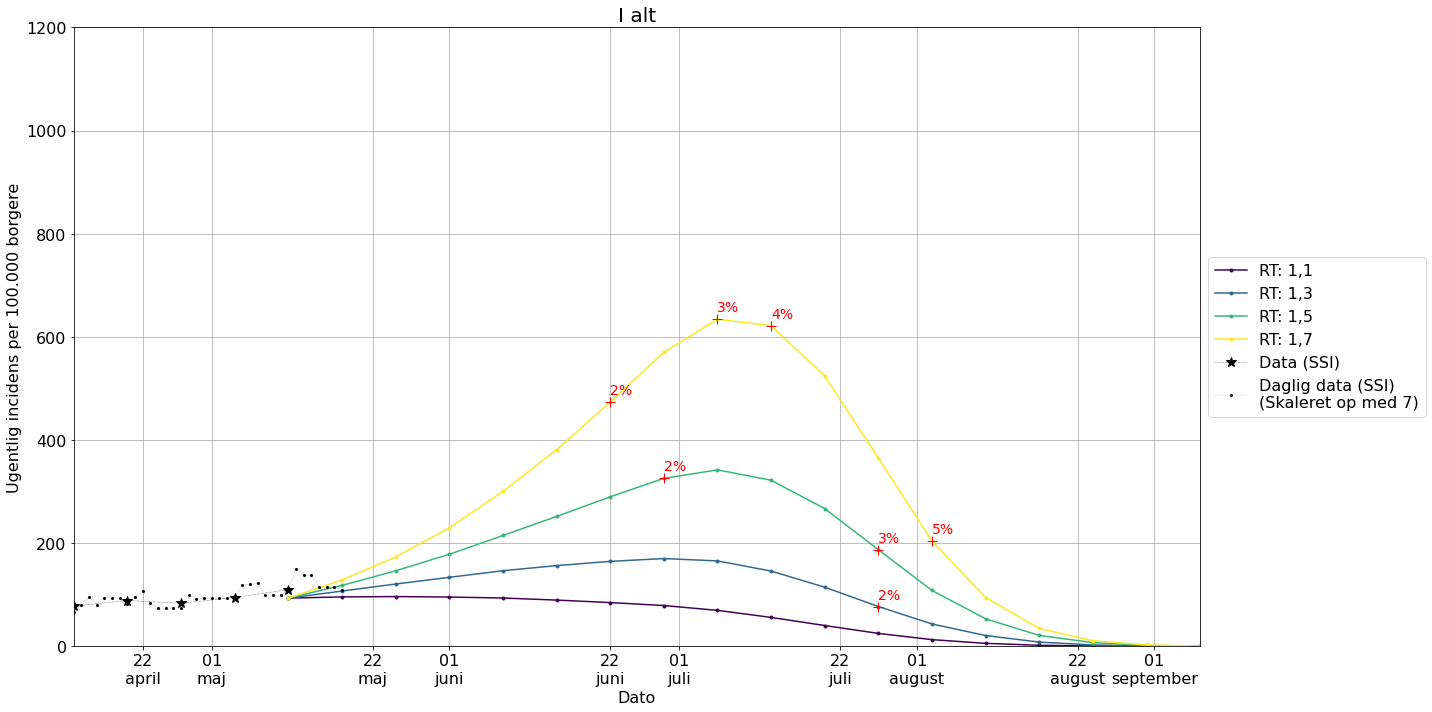

In [12]:
# Here comes the "I alt" plot

allRTs = np.arange(1.1,1.8,0.2)
genTime = 4.7 / 7 # Generation time, in weeks

tStart = plotDates[-1]
# print(tStart)

tEndWeeks = 18
tDelta = np.timedelta64(7,'D')

tSpan = np.arange(0,tEndWeeks) # Time span, in number of weeks since tStart
tSpanPlot = np.arange(tStart,tStart+np.timedelta64(7*tEndWeeks,'D'),tDelta) # Time span, as datetime64

#lastDateStr = pd.to_datetime(tSpanPlot[-1]).strftime('%d. %b')

xLims = [tStart-tDelta*4,tSpanPlot[-1]]

iniRow = dfCaseDiff.iloc[plotDates == tStart]

curCols = dfCaseDiff.columns

cmap = plt.cm.get_cmap(cmap_name,len(allRTs))

curMax = 1200


weights = [l/DK_age[-1] for l in DK_age[:-1]]
modArray = []
modCN = []

for i in range(0,len(curCols[:-1])):
    curAge = curCols[i]
    curPopSize = DK_age[i]
    curImmuneRate = immune_rate[i]

    
    vaccIni, vaccOne, vaccTwo = vaccKal[curAge]
    curData = dfCaseDiff[curAge].values
    curDataDaily = dfCaseDiffDaily[curAge].values
    iniCount = iniRow[curAge].values[0]


    # for curRT in allRTs:
    RTArray = []
    CNArray = []
    for k in range(0,len(allRTs)):
        curRT = allRTs[k]
        modelCount2 = predicted_cases(tSpanPlot, vaccKal[curAge], curRT, 
                                      S0=curPopSize*(1-curImmuneRate), init_count=iniCount, gen_time=genTime)
        CN = contact_number(tSpanPlot, vaccKal[curAge], curRT)
        
        RTArray.append(modelCount2)
        CNArray.append(modelCount2)

    modArray.append(RTArray)
    modCN.append(CNArray)


RTmodels_avg = []
CNmodels_avg = []
for i in range(0,len(allRTs)):
    avg_tmp = [len(curCols[1:-1])*sum([weights[j]*modArray[j][i][k] for j, col in enumerate(curCols[1:-1],1)])
               for k in range(len(tSpanPlot))]
    RTmodels_avg.append(avg_tmp)


i = 10
curAge = curCols[i]
curPopSize = DK_age[i]

curData = dfCaseDiff[curAge].values
curDataDaily = dfCaseDiffDaily[curAge].values
iniCount = iniRow[curAge].values[0]

RTmodels_avg = np.array(RTmodels_avg)

#lastDateStr = pd.to_datetime(tSpanPlot[-1]).strftime('%d. %b')

fig,ax1 = plt.subplots(1,1,figsize=(20,10))

for k in range(0,len(allRTs)):
    
    modelCount2, curPopSize = RTmodels_avg[k], DK_age[-1]
    
    ax1.plot(tSpanPlot, 100000*modelCount2/curPopSize,'.-',label=f'RT: {allRTs[k]:.1f}'.replace('.',','),
             linewidth=1.5,markersize=6,color=cmap(k))
    
    modelCount2_cumul = modelCount2.cumsum()
    rmc = [j - modelCount2_cumul[0] for j in modelCount2_cumul]

    pct_list = list(range(1,101,1))
    for i in pct_list:
        for j, c in enumerate(rmc[:-1]/curPopSize):
            filt = (round(100*c) <= i < round(100*rmc[j+1]/curPopSize))
            if filt and 100000*modelCount2[j+1]/curPopSize < curMax:
                pct_str = f"{round(100*rmc[j+1]/curPopSize)}%"
                ax1.plot(tSpanPlot[j+1], 100000*modelCount2[j+1]/curPopSize, "+r")
                ax1.text(tSpanPlot[j+1], 100000*modelCount2[j+1]/curPopSize+15, pct_str, color="red", fontsize=14)

ax1.plot(plotDates, 100000*curData/curPopSize, 'k*:', linewidth=0.5,label=f'Data (SSI)')

ax1.plot(plotDatesDaily, 100000*(curDataDaily*7)/curPopSize, 'k.:',
         linewidth=0.25,markersize=4,label=f'Daglig data (SSI)\n(Skaleret op med 7)')


ax1.set_ylim(bottom = 0,top=curMax)

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%B'))
ax1.set_xlim(xLims)

ax1.set_ylabel('Ugentlig incidens per 100.000 borgere')
ax1.set_xlabel('Dato')

ax1.grid()

ax1.set_title(curAge)

ax1.legend(loc='center left',bbox_to_anchor = (1.0, 0.5))

plt.tight_layout()

if saveFigures:
    plt.savefig('figs/RT_fremskrivning_Per100000_'+curAge)
        

# Tables

In [14]:
# Same thing, but in one large plot. Starting in the middle of april
cols = ['Age', 'CaseHospRate', 'Population', 'Start', 'End', 'RT', 'Count', 'CountCumul']
model_df = pd.DataFrame(columns=cols)


# allAges = dfCaseDiff.columns[0:6]
allAges = dfCaseDiff.columns[1:]

# fig,ax1 = plt.subplots(1,1,figsize=(12,6))
# fig, allAxes = plt.subplots(len(allAges),1,sharex=True,figsize=(16,46))
# fig,(ax1,ax2) = plt.subplots(2,1,sharex=True, gridspec_kw={'height_ratios': [4, 1]})

showMax = True

genTime = 4.7 / 7 # Generation time, in weeks

allRTs = np.arange(0.9,1.8,0.1)

cmap = plt.cm.get_cmap(cmap_name,len(allRTs))

tStart = np.datetime64('2021-05-11')

tEndWeeks = 22
tDelta = np.timedelta64(7,'D')

tSpan = np.arange(0,tEndWeeks) # Time span, in number of weeks since tStart
tSpanPlot = np.arange(tStart,tStart+np.timedelta64(7*tEndWeeks,'D'),tDelta) # Time span, as datetime64

xLims = [tStart-tDelta*2,tSpanPlot[-1]]

iniRow = dfCaseDiff.iloc[plotDates == tStart]

weights = [DK_age[1:][l]/DK_age[-1] for l in range(len(allAges))]

vacc1_min, vacc2_min, vacc2_max = 0.40, 0.95, 1.0

modArray = []
for i, age in enumerate(allAges, 0):
    #curCHR = case_hosp_rate[1:][i]
    #curAx = allAxes.flatten()[i]
    curAge = allAges[i]
    curPopSize = DK_age[1:][i]

    vaccIni, vaccOne, vaccTwo = vaccKal[curAge]

    curData = dfCaseDiff[curAge].values
    curDataDaily = dfCaseDiffDaily[curAge].values

    iniCount = iniRow[curAge].values[0]

    dataMax = max(curData)

    # curAx.axvspan(vaccIni,vaccOne,color='aquamarine',label='Vaccination start')
    # curAx.axvspan(vaccOne,vaccTwo,color='palegreen',label='Første dosis')
    # curAx.axvspan(vaccTwo,tSpanPlot[-1],color='springgreen',label='Færdigvaccineret')

    # curAx.set_title(int(curAge=="10-19")*'16-19 årige' + (1-int(curAge=="10-19"))*(curAge+' årige'))
    # if (curAge == 'I alt'):
    #     curAx.set_title(curAge)

    if age != "I alt":
        curImmuneRate = immune_rate[1:][i]
        RTArray = []
        for k in range(0,len(allRTs)):
            curRT = allRTs[k]
            for v1 in np.arange(vacc1_min, vacc2_min, 0.05):
                modelCount2 = predicted_cases(tSpanPlot, vaccKal[curAge], curRT, 
                                              S0=curPopSize*(1-curImmuneRate), init_count=iniCount, gen_time=genTime, 
                                              x1=v1)

                modelMax = max(modelCount2)
                top = int(showMax)*max(dataMax, modelMax)*1.1 + (1-int(showMax))*iniCount*4 

                # curAx.plot(tSpanPlot, modelCount2, '.-', label=f'RT: {curRT:.1f}'.replace('.',','),
                #            linewidth=1.5, markersize=6, color=cmap(k))

                modelCount2_cumul = modelCount2.cumsum()
                rmc = [j - modelCount2_cumul[0] for j in modelCount2_cumul]

                for n in range(len(tSpanPlot)):
                    new_row = {'Age':age, 'CaseHospRate':case_hosp_rate[1:][i], 'Population':curPopSize, 
                               'Start':tStart, 'End':tSpanPlot[n], 'RT':curRT, 'vacc1': v1,
                               'Count':modelCount2[n], 'CountCumul':rmc[n]}
                    model_df = model_df.append(new_row, ignore_index=True)

                RTArray.append(modelCount2)

                # pct_list = list(range(1,101,1))
                # for l in pct_list:
                #     for j, c in enumerate(rmc[:-1]/curPopSize):
                #         filt = (round(100*c) <= l < round(100*rmc[j+1]/curPopSize))
                #         if filt and (modelCount2[j+1] < top):
                #             pct_str = f"{100*rmc[j+1]/curPopSize:.0f}%"
                #             curAx.plot(tSpanPlot[j+1], modelCount2[j+1], "+r")
                #             curAx.text(tSpanPlot[j+1], modelCount2[j+1]+15, pct_str, color="red", fontsize=14)

            modArray.append(RTArray)


    # urAx.plot(plotDates, curData, 'k*:', label=f'Data (SSI)', linewidth=1,markersize=10)
    # curAx.plot(plotDatesDaily, curDataDaily*7, 'k.', label=f'Daglig data (SSI)\n(Skaleret op med 7)', 
    #            linewidth=0.25, markersize=4)

    # curAx.set_ylim(bottom=0, top=top)

    # curAx.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%B'))

    # curAx.set_xlim(xLims)

    # curAx.set_ylabel('Ugentlige smittetilfælde')
    # curAx.set_xlabel('Dato')

    # curAx.grid(color='black')
    # curAx.grid(axis='y')

    # curAx.legend()
    # curAx.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


#plt.tight_layout()

# if saveFigures:
#     plt.savefig('figs/RT_Fremskrivning_Aldersgrupper')
#plt.close()
#print("fig gen. and closed.")

model_df["PctCumul"] = model_df["CountCumul"]/model_df["Population"]   
model_df["HospCumul"] = model_df["CountCumul"]*model_df["CaseHospRate"]

model_df.to_csv('model_results_spread_prediction_var_vacc.csv')
model_df#.loc[model_df["Age"]=="20-29"]

,Age,CaseHospRate,Population,Start,End,RT,Count,CountCumul,vacc1,PctCumul,HospCumul
0,10-19,0.01,273589,2021-05-11,2021-05-11,0.9,5.380000e+02,0.000000,0.40,0,0.000000
1,10-19,0.01,273589,2021-05-11,2021-05-18,0.9,5.012558e+02,501.255775,0.40,0.00183215,5.012558
2,10-19,0.01,273589,2021-05-11,2021-05-25,0.9,4.649803e+02,966.236041,0.40,0.00353171,9.662360
3,10-19,0.01,273589,2021-05-11,2021-06-01,0.9,4.295661e+02,1395.802188,0.40,0.00510182,13.958022
4,10-19,0.01,273589,2021-05-11,2021-06-08,0.9,3.902657e+02,1786.067894,0.40,0.00652829,17.860679
5,10-19,0.01,273589,2021-05-11,2021-06-15,0.9,3.202976e+02,2106.365492,0.40,0.00769901,21.063655
6,10-19,0.01,273589,2021-05-11,2021-06-22,0.9,2.335821e+02,2339.947626,0.40,0.00855278,23.399476
7,10-19,0.01,273589,2021-05-11,2021-06-29,0.9,1.484542e+02,2488.401832,0.40,0.0090954,24.884018
8,10-19,0.01,273589,2021-05-11,2021-07-06,0.9,8.186175e+01,2570.263578,0.40,0.00939462,25.702636
9,10-19,0.01,273589,2021-05-11,2021-07-13,0.9,3.776493e+01,2608.028505,0.40,0.00953265,26.080285


,Age,CaseHospRate,Population,Start,End,RT,Count,CountCumul,vacc1,PctCumul,HospCumul
0,10-19,0.01,273589,2021-05-11,2021-05-11,0.9,5.380000e+02,0.000000,0.9,0,0.000000
1,10-19,0.01,273589,2021-05-11,2021-05-18,0.9,5.012558e+02,501.255775,0.9,0.00183215,5.012558
2,10-19,0.01,273589,2021-05-11,2021-05-25,0.9,4.649803e+02,966.236041,0.9,0.00353171,9.662360
3,10-19,0.01,273589,2021-05-11,2021-06-01,0.9,4.295661e+02,1395.802188,0.9,0.00510182,13.958022
4,10-19,0.01,273589,2021-05-11,2021-06-08,0.9,3.858011e+02,1781.603312,0.9,0.00651197,17.816033
5,10-19,0.01,273589,2021-05-11,2021-06-15,0.9,2.822607e+02,2063.863963,0.9,0.00754367,20.638640
6,10-19,0.01,273589,2021-05-11,2021-06-22,0.9,1.541477e+02,2218.011651,0.9,0.00810709,22.180117
7,10-19,0.01,273589,2021-05-11,2021-06-29,0.9,5.457011e+01,2272.581760,0.9,0.00830655,22.725818
8,10-19,0.01,273589,2021-05-11,2021-07-06,0.9,1.711093e+01,2289.692689,0.9,0.0083691,22.896927
9,10-19,0.01,273589,2021-05-11,2021-07-13,0.9,4.632897e+00,2294.325586,0.9,0.00838603,22.943256


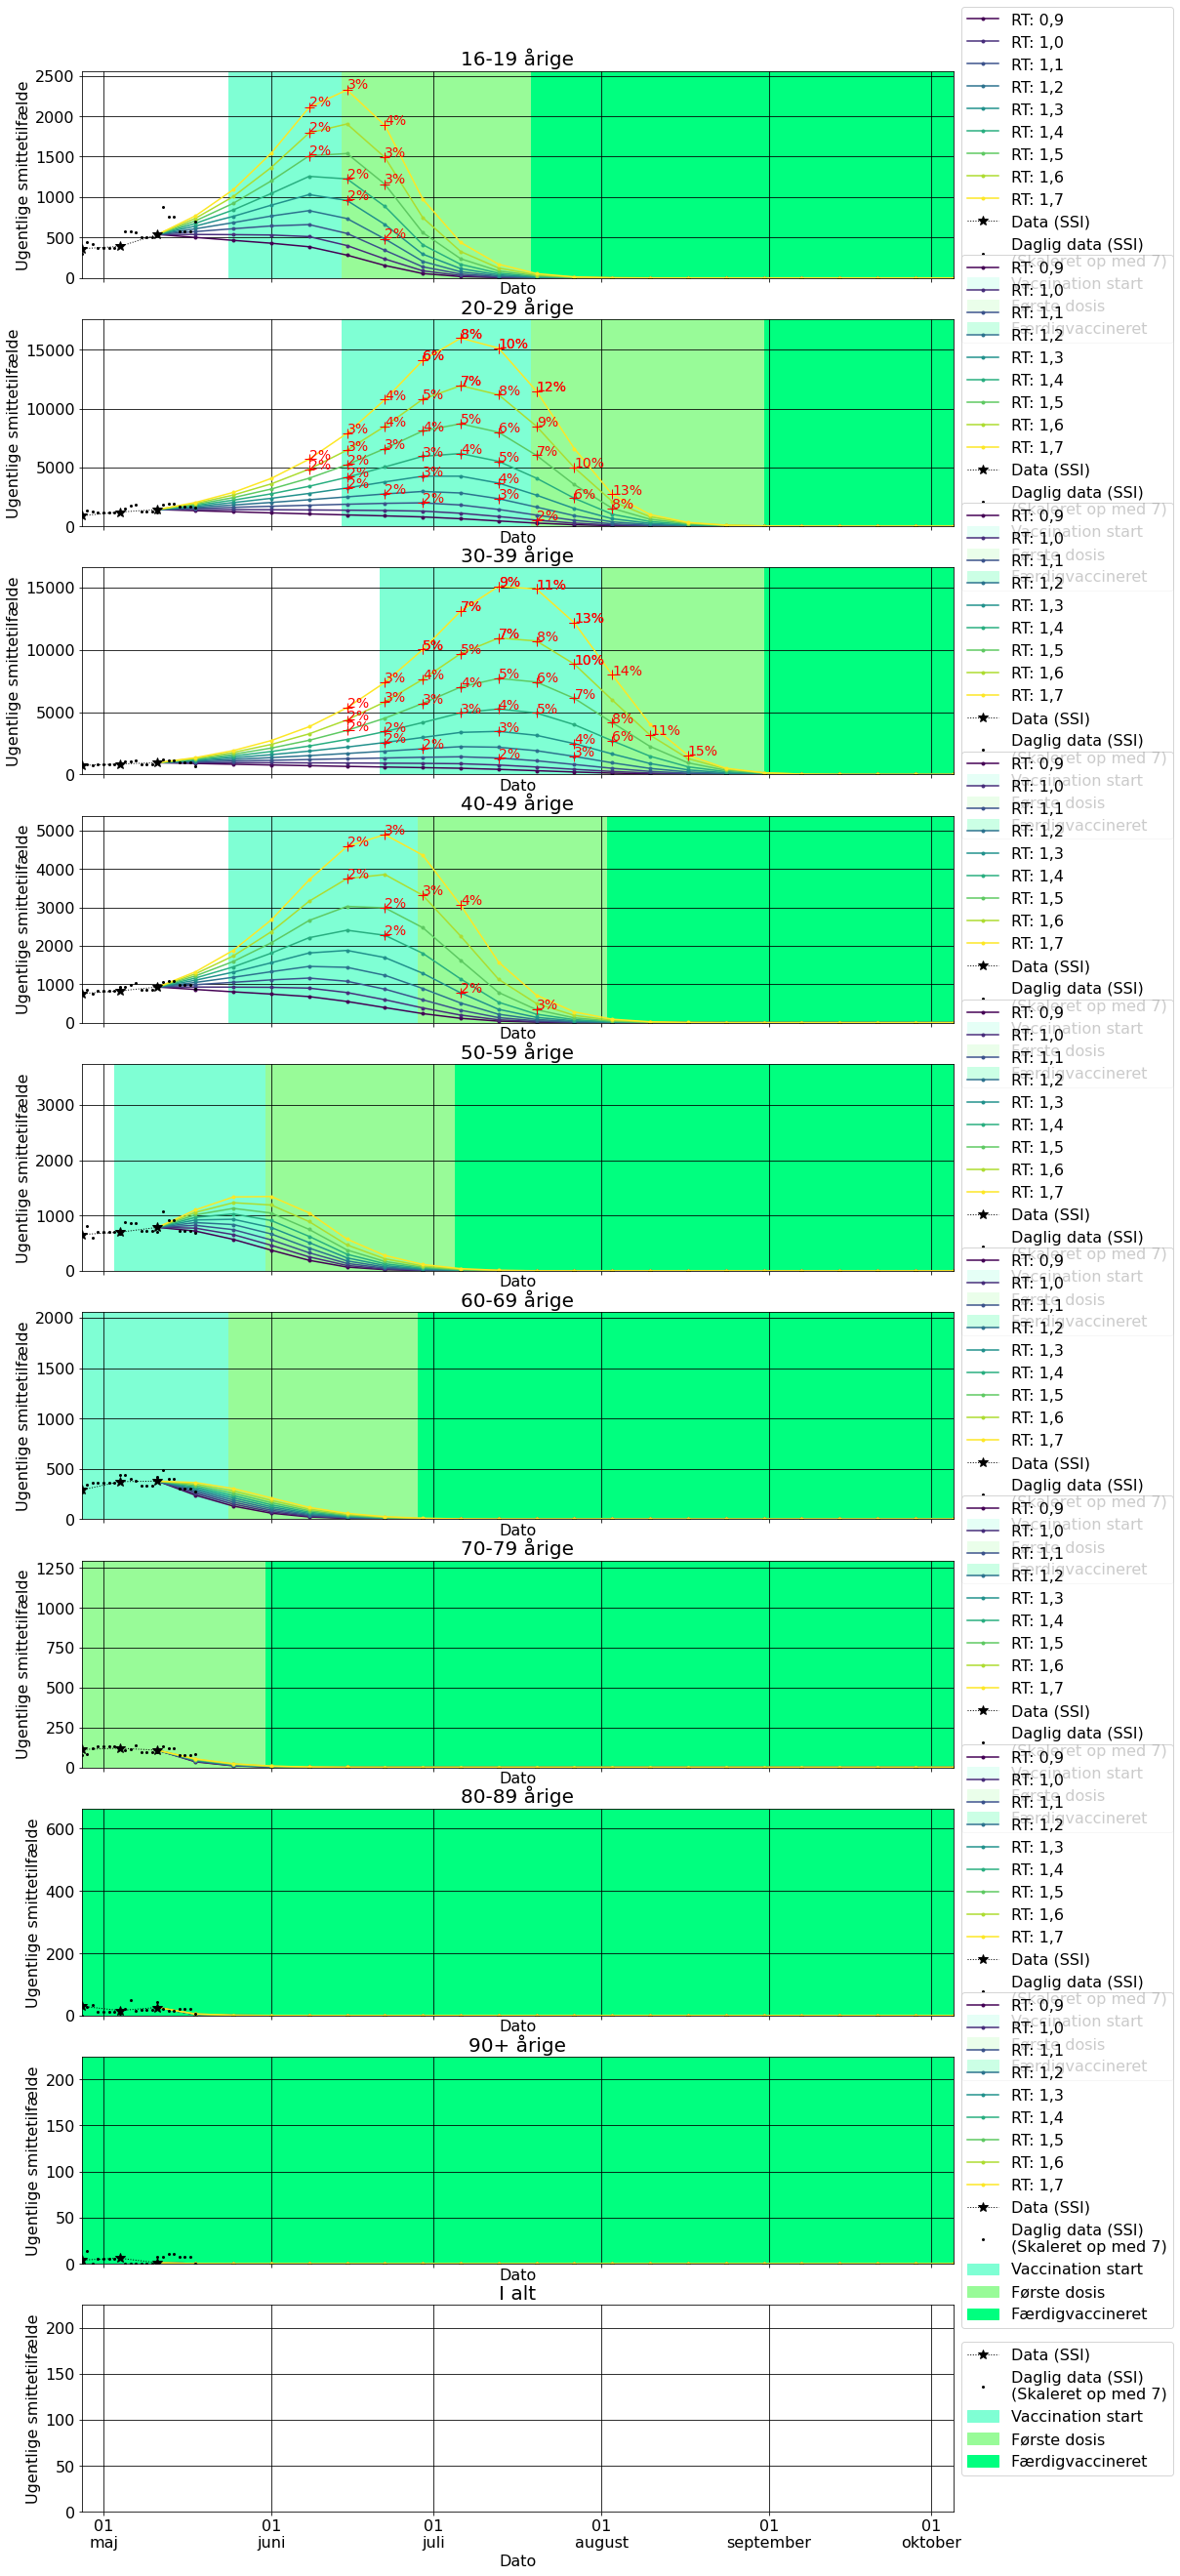

In [17]:
# Same thing, but in one large plot. Starting in the middle of april
cols = ['Age', 'CaseHospRate', 'Population', 'Start', 'End', 'RT', 'Count', 'CountCumul']
model_df = pd.DataFrame(columns=cols)


# allAges = dfCaseDiff.columns[0:6]
allAges = dfCaseDiff.columns[1:]

# fig,ax1 = plt.subplots(1,1,figsize=(12,6))
fig, allAxes = plt.subplots(len(allAges),1,sharex=True,figsize=(16,46))
# fig,(ax1,ax2) = plt.subplots(2,1,sharex=True, gridspec_kw={'height_ratios': [4, 1]})

showMax = True

genTime = 4.7 / 7 # Generation time, in weeks

allRTs = np.arange(0.9,1.8,0.1)

cmap = plt.cm.get_cmap(cmap_name,len(allRTs))

tStart = np.datetime64('2021-05-11')

tEndWeeks = 22
tDelta = np.timedelta64(7,'D')

tSpan = np.arange(0,tEndWeeks) # Time span, in number of weeks since tStart
tSpanPlot = np.arange(tStart,tStart+np.timedelta64(7*tEndWeeks,'D'),tDelta) # Time span, as datetime64

xLims = [tStart-tDelta*2,tSpanPlot[-1]]

iniRow = dfCaseDiff.iloc[plotDates == tStart]

weights = [DK_age[1:][l]/DK_age[-1] for l in range(len(allAges))]

vacc1_min, vacc2_min, vacc2_max = 0.40, 0.95, 1.0

modArray = []
for i, age in enumerate(allAges, 0):
    #curCHR = case_hosp_rate[1:][i]
    curAx = allAxes.flatten()[i]
    curAge = allAges[i]
    curPopSize = DK_age[1:][i]

    vaccIni, vaccOne, vaccTwo = vaccKal[curAge]

    curData = dfCaseDiff[curAge].values
    curDataDaily = dfCaseDiffDaily[curAge].values

    iniCount = iniRow[curAge].values[0]

    dataMax = max(curData)

    curAx.axvspan(vaccIni,vaccOne,color='aquamarine',label='Vaccination start')
    curAx.axvspan(vaccOne,vaccTwo,color='palegreen',label='Første dosis')
    curAx.axvspan(vaccTwo,tSpanPlot[-1],color='springgreen',label='Færdigvaccineret')

    curAx.set_title(int(curAge=="10-19")*'16-19 årige' + (1-int(curAge=="10-19"))*(curAge+' årige'))
    if (curAge == 'I alt'):
        curAx.set_title(curAge)

    if age != "I alt":
        curImmuneRate = immune_rate[1:][i]
        RTArray = []
        for k in range(0,len(allRTs)):
            curRT = allRTs[k]
            modelCount2 = predicted_cases(tSpanPlot, vaccKal[curAge], curRT, 
                                          S0=curPopSize*(1-curImmuneRate), init_count=iniCount, gen_time=genTime, 
                                          )

            modelMax = max(modelCount2)
            top = int(showMax)*max(dataMax, modelMax)*1.1 + (1-int(showMax))*iniCount*4 

            curAx.plot(tSpanPlot, modelCount2, '.-', label=f'RT: {curRT:.1f}'.replace('.',','),
                       linewidth=1.5, markersize=6, color=cmap(k))

            modelCount2_cumul = modelCount2.cumsum()
            rmc = [j - modelCount2_cumul[0] for j in modelCount2_cumul]

            for n in range(len(tSpanPlot)):
                new_row = {'Age':age, 'CaseHospRate':case_hosp_rate[1:][i], 'Population':curPopSize, 
                           'Start':tStart, 'End':tSpanPlot[n], 'RT':curRT, 'vacc1': v1,
                           'Count':modelCount2[n], 'CountCumul':rmc[n]}
                model_df = model_df.append(new_row, ignore_index=True)

            RTArray.append(modelCount2)

            pct_list = list(range(1,101,1))
            for l in pct_list:
                for j, c in enumerate(rmc[:-1]/curPopSize):
                    filt = (round(100*c) <= l < round(100*rmc[j+1]/curPopSize))
                    if filt and (modelCount2[j+1] < top):
                        pct_str = f"{100*rmc[j+1]/curPopSize:.0f}%"
                        curAx.plot(tSpanPlot[j+1], modelCount2[j+1], "+r")
                        curAx.text(tSpanPlot[j+1], modelCount2[j+1]+15, pct_str, color="red", fontsize=14)

        modArray.append(RTArray)


    curAx.plot(plotDates, curData, 'k*:', label=f'Data (SSI)', linewidth=1,markersize=10)
    curAx.plot(plotDatesDaily, curDataDaily*7, 'k.', label=f'Daglig data (SSI)\n(Skaleret op med 7)', 
               linewidth=0.25, markersize=4)

    curAx.set_ylim(bottom=0, top=top)

    curAx.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%B'))

    curAx.set_xlim(xLims)

    curAx.set_ylabel('Ugentlige smittetilfælde')
    curAx.set_xlabel('Dato')

    curAx.grid(color='black')
    # curAx.grid(axis='y')

    # curAx.legend()
    curAx.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


#plt.tight_layout()

if saveFigures:
    plt.savefig('figs/RT_Fremskrivning_Aldersgrupper')
#plt.close()
#print("fig gen. and closed.")

model_df["PctCumul"] = model_df["CountCumul"]/model_df["Population"]   
model_df["HospCumul"] = model_df["CountCumul"]*model_df["CaseHospRate"]

model_df.to_csv('model_results_spread_prediction.csv')
model_df#.loc[model_df["Age"]=="20-29"]

In [18]:
filt = (model_df["End"].isin(["2021-06-29", "2021-08-03", "2021-08-31"]))

table_cases = model_df.loc[filt, ["End", "Age", "RT", "CountCumul"]]
table_cases = pd.DataFrame(table_cases.groupby(["Age", "RT", "End"]).sum().unstack(["End", "RT"]))

table_cases

## styg kommaerne.

CountCumul                                                       \
End     2021-06-29   2021-08-03   2021-08-31   2021-06-29    2021-08-03   
RT             0.9          0.9          0.9          1.0           1.0   
Age                                                                       
10-19  2272.581760  2295.567271  2295.570308  2839.876981   2880.682043   
20-29  7339.392703  8843.717188  8862.831665  9581.054979  12371.432437   
30-39  4925.699728  6418.446840  6487.367464  6443.464604   9292.297609   
40-49  4261.038136  4429.927932  4430.082592  5427.505237   5732.115535   
50-59  1948.210630  1949.852827  1949.852892  2282.039662   2284.961353   
60-69   453.883030   453.968844   453.968846   515.549534    515.702103   
70-79    46.448115    46.448222    46.448222    51.074863     51.075052   
80-89     3.702630     3.702631     3.702631     4.015960      4.015963   
90+       0.142413     0.142413     0.142413     0.154465      0.154465   

                                                                             \
End      2021-08-31    2021-06-29    2021-08-03    2021-08-31    2021-06-29   
RT              1.0           1.1           1.1           1.1           1.2   
Age                                                                           
10-19   2880.689446   3514.938468   3583.373133   3583.389544   4312.453046   
20-29  12417.668597  12388.560680  17256.158246  17356.582536  15865.866946   
30-39   9462.182425   8350.486675  13461.336424  13838.160442  10720.742318   
40-49   5732.496737   6851.382663   7370.619137   7371.474406   8575.420906   
50-59   2284.961515   2651.293238   2656.214826   2656.215198   3059.102461   
60-69    515.702110    581.288608    581.545538    581.545553    651.424362   
70-79     51.075052     55.755669     55.755988     55.755988     60.499875   
80-89      4.015963      4.325499      4.325505      4.325505      4.632079   
90+        0.154465      0.166371      0.166371      0.166371      0.178163   

       ...                                                          \
End    ...    2021-08-31    2021-06-29    2021-08-03    2021-08-31   
RT     ...           1.4           1.5           1.5           1.5   
Age    ...                                                           
10-19  ...   6586.350805   7597.593312   7954.860992   7955.054951   
20-29  ...  45043.459335  31473.476074  59269.936145  60135.085546   
30-39  ...  41339.328901  21451.040127  53847.191802  57440.341608   
40-49  ...  15105.846585  16028.171833  18931.518896  18942.181639   
50-59  ...   4022.046925   4547.308089   4574.186723   4574.192259   
60-69  ...    807.180612    891.563726    892.970984    892.971214   
70-79  ...     70.210290     75.187076     75.188829     75.188829   
80-89  ...      5.238957      5.540242      5.540271      5.540271   
90+    ...      0.201506      0.213095      0.213096      0.213096   

                                                                             \
End      2021-06-29    2021-08-03    2021-08-31    2021-06-29    2021-08-03   
RT              1.6           1.6           1.6           1.7           1.7   
Age                                                                           
10-19   9045.619491   9544.207981   9544.519522  10698.735798  11376.841139   
20-29  38817.142936  77556.880708  78723.548788  47448.588390  99415.563938   
30-39  26544.064374  72733.137146  77709.274792  32562.248090  95809.242387   
40-49  19448.426694  23573.061100  23590.411860  23431.458330  29142.606426   
50-59   5143.524922   5181.783753   5181.793431   5796.136485   5849.427476   
60-69    982.689350    984.696012    984.696420   1079.968972   1082.770337   
70-79     80.254863     80.257366     80.257366     85.417524     85.421022   
80-89      5.840687      5.840728      5.840728      6.140619      6.140675   
90+        0.224652      0.224653      0.224653      0.236188      0.236191   

                      
End       2021-08-31  
RT               1.

In [19]:
print(model_df["End"].unique())
filt = (model_df["End"].isin(["2021-06-29", "2021-07-13", "2021-07-20", "2021-08-03", "2021-08-31"]))
#filt = (model_df["End"].isin(["2021-06-01", "2021-06-29"]))

table_hosp = model_df.loc[filt, ["End", "Age", "RT", "HospCumul"]]
table_hosp = pd.DataFrame(table_hosp.groupby(["Age", "RT", "End"]).sum().unstack(["End", "RT"]))
table_hosp.loc['I alt',:] = table_hosp.sum(axis=0)

table_hosp

['2021-05-11T00:00:00.000000000' '2021-05-18T00:00:00.000000000'
 '2021-05-25T00:00:00.000000000' '2021-06-01T00:00:00.000000000'
 '2021-06-08T00:00:00.000000000' '2021-06-15T00:00:00.000000000'
 '2021-06-22T00:00:00.000000000' '2021-06-29T00:00:00.000000000'
 '2021-07-06T00:00:00.000000000' '2021-07-13T00:00:00.000000000'
 '2021-07-20T00:00:00.000000000' '2021-07-27T00:00:00.000000000'
 '2021-08-03T00:00:00.000000000' '2021-08-10T00:00:00.000000000'
 '2021-08-17T00:00:00.000000000' '2021-08-24T00:00:00.000000000'
 '2021-08-31T00:00:00.000000000' '2021-09-07T00:00:00.000000000'
 '2021-09-14T00:00:00.000000000' '2021-09-21T00:00:00.000000000'
 '2021-09-28T00:00:00.000000000' '2021-10-05T00:00:00.000000000']


HospCumul                                                  \
End    2021-06-29  2021-07-13  2021-07-20  2021-08-03  2021-08-31   
RT            0.9         0.9         0.9         0.9         0.9   
Age                                                                 
10-19   22.725818   22.943256   22.953655   22.955673   22.955703   
20-29  146.787854  168.299278  173.534752  176.874344  177.256633   
30-39  197.027989  232.896299  244.818423  256.737874  259.494699   
40-49  255.662288  264.785483  265.542436  265.795676  265.804955   
50-59  155.856850  155.985515  155.987895  155.988226  155.988231   
60-69   59.004794   59.015778   59.015929   59.015950   59.015950   
70-79   10.218585   10.218608   10.218609   10.218609   10.218609   
80-89    1.481052    1.481053    1.481053    1.481053    1.481053   
90+      0.056965    0.056965    0.056965    0.056965    0.056965   
I alt  848.822196  915.682235  933.609716  949.124368  952.272798   

                                                                        ...  \
End     2021-06-29   2021-07-13   2021-07-20   2021-08-03   2021-08-31  ...   
RT             1.0          1.0          1.0          1.0          1.0  ...   
Age                                                                     ...   
10-19    28.398770    28.781910    28.802518    28.806820    28.806894  ...   
20-29   191.621100   229.991313   240.312127   247.428649   248.353372  ...   
30-39   257.738584   322.189264   345.875294   371.691904   378.487297  ...   
40-49   325.650314   341.867800   343.379311   343.926932   343.949804  ...   
50-59   182.563173   182.791384   182.796186   182.796908   182.796921  ...   
60-69    67.021439    67.040921    67.041227    67.041273    67.041274  ...   
70-79    11.236470    11.236511    11.236511    11.236511    11.236511  ...   
80-89     1.606384     1.606385     1.606385     1.606385     1.606385  ...   
90+       0.061786     0.061786     0.061786     0.061786     0.061786  ...   
I alt  1065.898020  1185.567274  1221.111347  1254.597170  1262.340246  ...   

                                                                        \
End     2021-06-29   2021-07-13   2021-07-20   2021-08-03   2021-08-31   
RT             1.6          1.6          1.6          1.6          1.6   
Age                                                                      
10-19    90.456195    94.953280    95.335289    95.442080    95.445195   
20-29   776.342859  1239.230393  1409.372379  1551.137614  1574.470976   
30-39  1061.762575  1887.782899  2316.274332  2909.325486  3108.370992   
40-49  1166.905602  1369.609868  1399.470496  1414.383666  1415.424712   
50-59   411.481994   414.411759   414.519696   414.542700   414.543474   
60-69   127.749616   128.001830   128.008945   128.010482   128.010535   
70-79    17.656070    17.656602    17.656617    17.656621    17.656621   
80-89     2.336275     2.336291     2.336291     2.336291     2.336291   
90+       0.089861     0.089861     0.089861     0.089861     0.089861   
I alt  3654.781045  5154.072783  5783.063906  6532.924801  6756.348656   

                                                                        
End     2021-06-29   2021-07-13   2021-07-20   2021-08-03   2021-08-31  
RT             1.7          1.7          1.7          1.7          1.7  
Age                                                                     
10-19   106.987358   113.072998   113.613117   113.768411   113.773175  
20-29   948.971768  1572.201781  1802.130031  1988.311279  2016.579731  
30-39  1302.489924  2430.764340  3025.915125  3832.369695  4079.687562  
40-49  1405.887500  1683.722607  1726.525021  1748.556386  1750.167112  
50-59   463.690919   467.757727   467.918383   467.954198   467.955504  
60-69   140.395966   140.747060   140.757729   140.760144   140.760234  
70-79    18.791855    18.792597    18.792620    18.792625    18.792625  
80-89     2.456247     2.456269     2.456270     2.456270     2.456270  
90+       0.094475   

# OLD STUFF BELOW

In [ ]:
# Same thing, but in one large plot. Starting in the middle of april

# allAges = dfCaseDiff.columns[0:6]
allAges = dfCaseDiff.columns[1:]

# fig,ax1 = plt.subplots(1,1,figsize=(12,6))
fig, allAxes = plt.subplots(len(allAges),1,sharex=True,figsize=(16,46))
# fig,(ax1,ax2) = plt.subplots(2,1,sharex=True, gridspec_kw={'height_ratios': [4, 1]})

showMax = True

genTime = 4.7 / 7 # Generation time, in weeks

allRTs = np.arange(1.1,1.8,0.2)

cmap = plt.cm.get_cmap(cmap_name,len(allRTs))

tStart = np.datetime64('2021-05-11')
# tStart = plotDates[-1]
#print(tStart)

tEndWeeks = 22
tDelta = np.timedelta64(7,'D')

tSpan = np.arange(0,tEndWeeks) # Time span, in number of weeks since tStart
tSpanPlot = np.arange(tStart,tStart+np.timedelta64(7*tEndWeeks,'D'),tDelta) # Time span, as datetime64

print(tSpanPlot)

xLims = [tStart-tDelta*2,tSpanPlot[-1]]

iniRow = dfCaseDiff.iloc[plotDates == tStart]

weights = [DK_age[1:][l]/DK_age[-1] for l in range(len(allAges))]

modArray = []
for i, age in enumerate(allAges, 0):
        curAx = allAxes.flatten()[i]
        curAge = allAges[i]
        curPopSize = DK_age[1:][i]
        
        print(curAge, curPopSize)
        vaccIni, vaccOne, vaccTwo = vaccKal[curAge]

        curData = dfCaseDiff[curAge].values
        curDataDaily = dfCaseDiffDaily[curAge].values

        iniCount = iniRow[curAge].values[0]

        dataMax = max(curData)

        curAx.axvspan(vaccIni,vaccOne,color='aquamarine',label='Vaccination start')
        curAx.axvspan(vaccOne,vaccTwo,color='palegreen',label='Første dosis')
        curAx.axvspan(vaccTwo,tSpanPlot[-1],color='springgreen',label='Færdigvaccineret')

        #curAx.set_title(curAge+' årige')
        curAx.set_title(int(curAge=="10-19")*'16-19 årige' + (1-int(curAge=="10-19"))*(curAge+' årige'))
        if (curAge == 'I alt'):
            curAx.set_title(curAge)

        if age != "I alt":
            curImmuneRate = immune_rate[1:][i]
            # for curRT in allRTs:
            RTArray = []
            for k in range(0,len(allRTs)):
                curRT = allRTs[k]

                modelCount2 = predicted_cases(tSpanPlot, vaccKal[curAge], curRT, 
                                              S0=curPopSize*(1-curImmuneRate), init_count=iniCount, gen_time=genTime)
                
                modelMax = max(modelCount2)
                top = int(showMax)*max(dataMax, modelMax)*1.1 + (1-int(showMax))*iniCount*4 

                curAx.plot(tSpanPlot, modelCount2, '.-', label=f'RT: {curRT:.1f}'.replace('.',','),
                           linewidth=1.5, markersize=6, color=cmap(k))

                modelCount2_cumul = modelCount2.cumsum()
                rmc = [j - modelCount2_cumul[0] for j in modelCount2_cumul]

                RTArray.append(modelCount2)
                
                pct_list = list(range(1,101,1))
                for l in pct_list:
                    for j, c in enumerate(rmc[:-1]/curPopSize):
                        filt = (round(100*c) <= l < round(100*rmc[j+1]/curPopSize))
                        if filt and (modelCount2[j+1] < top):
                            pct_str = f"{100*rmc[j+1]/curPopSize:.0f}%"
                            curAx.plot(tSpanPlot[j+1], modelCount2[j+1], "+r")
                            curAx.text(tSpanPlot[j+1], modelCount2[j+1]+15, pct_str, color="red", fontsize=14)

            modArray.append(RTArray)

        elif age == "I alt":
            RTmodels_avg = []
            for i in range(0,len(allRTs)):
                avg_tmp = [len(allAges[:-1])*sum([weights[j]*modArray[j][i][k] 
                                                  for j, col in enumerate(allAges[:-1])]) 
                           for k in range(len(tSpanPlot))]
                RTmodels_avg.append(avg_tmp)
            RTmodels_avg = np.array(RTmodels_avg)

            for k in range(0,len(allRTs)):
                modelCount2, curPopSize = RTmodels_avg[k], DK_age[-1]
                curAx.plot(tSpanPlot, modelCount2,'.-',label=f'RT: {allRTs[k]:.1f}'.replace('.',','),
                         linewidth=1.5,markersize=6,color=cmap(k))

                top = modelMax = max(modelCount2)*1.1
                
                modelCount2_cumul = modelCount2.cumsum()
                rmc = [j - modelCount2_cumul[0] for j in modelCount2_cumul]

                pct_list = list(range(1,101,1))
                for l in pct_list:
                    for j, c in enumerate(rmc[:-1]/curPopSize):
                        filt = (round(100*c) <= l < round(100*rmc[j+1]/curPopSize))
                        if filt and modelCount2[j+1] < top:
                            pct_str = f"{int(round(100*rmc[j+1]/curPopSize,0))}%"
                            curAx.plot(tSpanPlot[j+1], modelCount2[j+1], "+r")
                            curAx.text(tSpanPlot[j+1], modelCount2[j+1]+15, pct_str, color="red", fontsize=14)


        #curAx.plot(curDates, curData, 'k*:', label=f'Data (SSI)', linewidth=1,markersize=10)
        curAx.plot(plotDates, curData, 'k*:', label=f'Data (SSI)', linewidth=1,markersize=10)
        # curAx.plot(plotDates,curData,'k*:',linewidth=0.5,label=f'Data for {curAge} årige')
        curAx.plot(plotDatesDaily, curDataDaily*7, 'k.', label=f'Daglig data (SSI)\n(Skaleret op med 7)', 
                   linewidth=0.25, markersize=4)

        curAx.set_ylim(bottom=0, top=top)

        curAx.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%B'))

        curAx.set_xlim(xLims)

        curAx.set_ylabel('Ugentlige smittetilfælde')
        # curAx.set_xlabel('Dato')

        # curAx.grid(color='black')
        curAx.grid(axis='y')

        # curAx.legend()
        curAx.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


#plt.tight_layout()

if saveFigures:
    plt.savefig('figs/RT_Fremskrivning_Aldersgrupper')
plt.close()
# curDates    
#dfCaseDiff[curAge]

In [ ]:
# Same thing, but in one large plot. Starting in the middle of april
cols = ['Age', 'CaseHospRate', 'Population', 'Start', 'End', 'RT', 'Count', 'CountCumul']
model_df = pd.DataFrame(columns=cols)


# allAges = dfCaseDiff.columns[0:6]
allAges = dfCaseDiff.columns[1:]

# fig,ax1 = plt.subplots(1,1,figsize=(12,6))
fig, allAxes = plt.subplots(len(allAges),1,sharex=True,figsize=(16,46))
# fig,(ax1,ax2) = plt.subplots(2,1,sharex=True, gridspec_kw={'height_ratios': [4, 1]})

showMax = True

genTime = 4.7 / 7 # Generation time, in weeks

allRTs = np.arange(0.9,1.8,0.1)

cmap = plt.cm.get_cmap(cmap_name,len(allRTs))

tStart = np.datetime64('2021-05-11')

tEndWeeks = 22
tDelta = np.timedelta64(7,'D')

tSpan = np.arange(0,tEndWeeks) # Time span, in number of weeks since tStart
tSpanPlot = np.arange(tStart,tStart+np.timedelta64(7*tEndWeeks,'D'),tDelta) # Time span, as datetime64

xLims = [tStart-tDelta*2,tSpanPlot[-1]]

iniRow = dfCaseDiff.iloc[plotDates == tStart]

weights = [DK_age[1:][l]/DK_age[-1] for l in range(len(allAges))]

vacc1_min, vacc2_min, vacc2_max = 0.40, 0.95, 1.0

modArray = []
for i, age in enumerate(allAges, 0):
    # print(i, age)
    #curCHR = case_hosp_rate[1:][i]
    curAx = allAxes.flatten()[i]
    curAge = allAges[i]
    curPopSize = DK_age[1:][i]

    # print(curAge, curPopSize)
    vaccIni, vaccOne, vaccTwo = vaccKal[curAge]

    curData = dfCaseDiff[curAge].values
    curDataDaily = dfCaseDiffDaily[curAge].values

    iniCount = iniRow[curAge].values[0]

    dataMax = max(curData)

    curAx.axvspan(vaccIni,vaccOne,color='aquamarine',label='Vaccination start')
    curAx.axvspan(vaccOne,vaccTwo,color='palegreen',label='Første dosis')
    curAx.axvspan(vaccTwo,tSpanPlot[-1],color='springgreen',label='Færdigvaccineret')

    # curAx.set_title(curAge+' årige')
    curAx.set_title(int(curAge=="10-19")*'16-19 årige' + (1-int(curAge=="10-19"))*(curAge+' årige'))
    if (curAge == 'I alt'):
        curAx.set_title(curAge)

    if age != "I alt":
        curImmuneRate = immune_rate[1:][i]
        # for curRT in allRTs:
        RTArray = []
        for k in range(0,len(allRTs)):
            curRT = allRTs[k]
            for v1 in range(vacc1_min, vacc2_min)
                modelCount2 = predicted_cases(tSpanPlot, vaccKal[curAge], curRT, 
                                              S0=curPopSize*(1-curImmuneRate), init_count=iniCount, gen_time=genTime
                                              x1=v1)

                modelMax = max(modelCount2)
                top = int(showMax)*max(dataMax, modelMax)*1.1 + (1-int(showMax))*iniCount*4 

                curAx.plot(tSpanPlot, modelCount2, '.-', label=f'RT: {curRT:.1f}'.replace('.',','),
                           linewidth=1.5, markersize=6, color=cmap(k))

                modelCount2_cumul = modelCount2.cumsum()
                rmc = [j - modelCount2_cumul[0] for j in modelCount2_cumul]

                for n in range(len(tSpanPlot)):
                    new_row = {'Age':age, 'CaseHospRate':case_hosp_rate[1:][i], 'Population':curPopSize, 
                               'Start':tStart, 'End':tSpanPlot[n], 'RT':curRT, 'vacc1': v1
                               'Count':modelCount2[n], 'CountCumul':rmc[n]}
                    model_df = model_df.append(new_row, ignore_index=True)

                RTArray.append(modelCount2)

                pct_list = list(range(1,101,1))
                for l in pct_list:
                    for j, c in enumerate(rmc[:-1]/curPopSize):
                        filt = (round(100*c) <= l < round(100*rmc[j+1]/curPopSize))
                        if filt and (modelCount2[j+1] < top):
                            pct_str = f"{100*rmc[j+1]/curPopSize:.0f}%"
                            curAx.plot(tSpanPlot[j+1], modelCount2[j+1], "+r")
                            curAx.text(tSpanPlot[j+1], modelCount2[j+1]+15, pct_str, color="red", fontsize=14)

            modArray.append(RTArray)

    elif age == "I alt":
        RTmodels_avg = []
        for i in range(0,len(allRTs)):
            avg_tmp = [len(allAges[:-1])*sum([weights[j]*modArray[j][i][k] 
                                              for j, col in enumerate(allAges[:-1])]) 
                       for k in range(len(tSpanPlot))]
            RTmodels_avg.append(avg_tmp)
        RTmodels_avg = np.array(RTmodels_avg)

        for k in range(0,len(allRTs)):
            curRT = allRTs[k]

            modelCount2, curPopSize = RTmodels_avg[k], DK_age[-1]
            curAx.plot(tSpanPlot, modelCount2,'.-',label=f'RT: {allRTs[k]:.1f}'.replace('.',','),
                     linewidth=1.5,markersize=6,color=cmap(k))

            top = modelMax = max(modelCount2)*1.1

            modelCount2_cumul = modelCount2.cumsum()
            rmc = [j - modelCount2_cumul[0] for j in modelCount2_cumul]

            for n in range(len(tSpanPlot)):
                new_row = {'Age':age, 'CaseHospRate':None, 'Population':curPopSize, 
                           'Start':tStart, 'End':tSpanPlot[n], 'RT':curRT, 
                           'Count':modelCount2[n], 'CountCumul':rmc[n]}
                model_df = model_df.append(new_row, ignore_index=True)

            pct_list = list(range(1,101,1))
            for l in pct_list:
                for j, c in enumerate(rmc[:-1]/curPopSize):
                    filt = (round(100*c) <= l < round(100*rmc[j+1]/curPopSize))
                    if filt and modelCount2[j+1] < top:
                        pct_str = f"{round(100*rmc[j+1]/curPopSize,0)}%"
                        curAx.plot(tSpanPlot[j+1], modelCount2[j+1], "+r")
                        curAx.text(tSpanPlot[j+1], modelCount2[j+1]+15, pct_str, color="red", fontsize=14)


    #curAx.plot(curDates, curData, 'k*:', label=f'Data (SSI)', linewidth=1,markersize=10)
    curAx.plot(plotDates, curData, 'k*:', label=f'Data (SSI)', linewidth=1,markersize=10)
    # curAx.plot(plotDates,curData,'k*:',linewidth=0.5,label=f'Data for {curAge} årige')
    curAx.plot(plotDatesDaily, curDataDaily*7, 'k.', label=f'Daglig data (SSI)\n(Skaleret op med 7)', 
               linewidth=0.25, markersize=4)

    curAx.set_ylim(bottom=0, top=top)

    curAx.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%B'))

    curAx.set_xlim(xLims)

    curAx.set_ylabel('Ugentlige smittetilfælde')
    # curAx.set_xlabel('Dato')

    # curAx.grid(color='black')
    curAx.grid(axis='y')

    # curAx.legend()
    curAx.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


#plt.tight_layout()

if saveFigures:
    plt.savefig('figs/RT_Fremskrivning_Aldersgrupper')
#plt.close()
#print("fig gen. and closed.")

model_df["PctCumul"] = model_df["CountCumul"]/model_df["Population"]   
model_df["HospCumul"] = model_df["CountCumul"]*model_df["CaseHospRate"]

model_df.to_csv('model_results_spread_prediction.csv')
model_df#.loc[model_df["Age"]=="20-29"]